In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

In [26]:
#Directory = "4.21"
#Directory = "4.6/test_set_01"
Directory = "4.22"

In [27]:
def process_data(df, timerange):
    df.drop_duplicates(subset = 'Timestamp',inplace = True)
    # Peixuan: 将时间轴设为data的index
    df.set_index('Timestamp', inplace = True)
    # 10302019 to list
    # Peixuan: 将时间轴应用于index (用新的list re-index)
    df = df.reindex(timerange)
    # Peixuan: 插值
    df = df.apply(pd.Series.interpolate)
    # Peixuan: Fill NaN with 0
    df = df.fillna(0)
    df['Timestamp'] = df.index
    return df

In [28]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_four_flow(raw_data_0, raw_data_1, raw_data_2, raw_data_3, period, step, fairness_list):
    raw_data_0.index = [i for i in range(1500)]
    raw_data_1.index = [i for i in range(1500)]
    raw_data_2.index = [i for i in range(1500)]
    raw_data_3.index = [i for i in range(1500)]
    
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)
    raw_data_2['Short_th'] = raw_data_2['Data'].shift(step)
    raw_data_3['Short_th'] = raw_data_3['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)
    period_2 = raw_data_2.fillna(0)
    period_3 = raw_data_3.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']
    period_2['Short_th'] = period_2['Data'] - period_2['Short_th']
    period_3['Short_th'] = period_3['Data'] - period_3['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period
    period_2['Short_th'] = period_2['Short_th']/period
    period_3['Short_th'] = period_3['Short_th']/period
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Throughput(bps)")
    plt.title("Short-tern Throughput")
    plt.legend()
    line = plt.axhline(y=10000000, xmin=0, xmax=0.015, linewidth=2, color = 'violet')
    line.set_dashes((10, 4))
    plt.ylim(0, 20000000)
    plt.plot(period_0['Timestamp'], period_0['Short_th'], color='red', label='th0')
    plt.plot(period_1['Timestamp'], period_1['Short_th'], color='blue', label='th1')
    plt.plot(period_2['Timestamp'], period_2['Short_th'], color='green', label='th2')
    plt.plot(period_3['Timestamp'], period_3['Short_th'], color='orange', label='th3')


    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    merge_short_fairness['Short_th_flow2'] = period_2['Short_th']
    merge_short_fairness['Short_th_flow3'] = period_3['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']+x['Short_th_flow3'])*(x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']+x['Short_th_flow3']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 4*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']+x['Short_th_flow2']*x['Short_th_flow2']+x['Short_th_flow3']*x['Short_th_flow3']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Jain's Fairness Index")
    plt.title("Fairness")
    plt.legend()
    plt.plot(merge_short_fairness['Timestamp'], merge_short_fairness['Short_fairness'], color='blue')
    

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)
    

In [29]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_three_flow(raw_data_0, raw_data_1, raw_data_2, period, step, fairness_list):
    raw_data_0.index = [i for i in range(1500)]
    raw_data_1.index = [i for i in range(1500)]
    raw_data_2.index = [i for i in range(1500)]
    
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)
    raw_data_2['Short_th'] = raw_data_2['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)
    period_2 = raw_data_2.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']
    period_2['Short_th'] = period_2['Data'] - period_2['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period
    period_2['Short_th'] = period_2['Short_th']/period
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Throughput(bps)")
    plt.title("Short-tern Throughput")
    plt.legend()
    line = plt.axhline(y=10000000, xmin=0, xmax=0.015, linewidth=2, color = 'violet')
    line.set_dashes((10, 4))
    #plt.xlim(0, 1)
    plt.ylim(-50, 20000000)
    plt.plot(period_0['Timestamp'], period_0['Short_th'], color='red', label='th0')
    plt.plot(period_1['Timestamp'], period_1['Short_th'], color='blue', label='th1')
    plt.plot(period_2['Timestamp'], period_2['Short_th'], color='green', label='th2')

    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    merge_short_fairness['Short_th_flow2'] = period_2['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2'])*(x['Short_th_flow0']+x['Short_th_flow1']+x['Short_th_flow2']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 3*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']+x['Short_th_flow2']*x['Short_th_flow2']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Jain's Fairness Index")
    plt.title("Fairness")
    plt.legend()
    plt.plot(merge_short_fairness['Timestamp'], merge_short_fairness['Short_fairness'], color='blue')

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)

In [30]:
# Function to measure fairness
# Using Jain's Fairness Index to measure

def measure_fairness_two_flow(raw_data_0, raw_data_1, period, step, fairness_list):    
    
    raw_data_0.index = [i for i in range(1500)]
    raw_data_1.index = [i for i in range(1500)]
        
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)
    raw_data_1['Short_th'] = raw_data_1['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)
    period_1 = raw_data_1.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']
    period_1['Short_th'] = period_1['Data'] - period_1['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period
    period_1['Short_th'] = period_1['Short_th']/period
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Throughput(bps)")
    plt.title("Short-tern Throughput")
    plt.legend()
    line = plt.axhline(y=10000000, xmin=0, xmax=0.015, linewidth=2, color = 'violet')
    line.set_dashes((10, 4))
    #plt.xlim(0, 1)
    plt.ylim(-50, 20000000)
    plt.plot(period_0['Timestamp'], period_0['Short_th'], color='red', label='th0')
    plt.plot(period_1['Timestamp'], period_1['Short_th'], color='blue', label='th1')

    merge_short_fairness = pd.DataFrame()
    
    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']
    merge_short_fairness['Short_th_flow1'] = period_1['Short_th']
    
    #print(period_1['Short_th'])
    #print(merge_short_fairness['Short_th_flow1'])

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']+x['Short_th_flow1'])*(x['Short_th_flow0']+x['Short_th_flow1']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: 2*(x['Short_th_flow0']*x['Short_th_flow0']+x['Short_th_flow1']*x['Short_th_flow1']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()
    
    plt.figure(figsize=(8,5))
    plt.xlabel("Time(sec)")
    plt.ylabel("Jain's Fairness Index")
    plt.title("Fairness")
    plt.legend()
    plt.plot(merge_short_fairness['Timestamp'], merge_short_fairness['Short_fairness'], color='blue')

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)

In [31]:
def measure_fairness_one_flow(raw_data_0, period, step, fairness_list):
    raw_data_0['Short_th'] = raw_data_0['Data'].shift(step)

    period_0 = raw_data_0.fillna(0)

    period_0['Short_th'] = period_0['Data'] - period_0['Short_th']

    period_0['Short_th'] = period_0['Short_th']/period

    merge_short_fairness = pd.DataFrame()

    merge_short_fairness['Timestamp'] = period_0['Timestamp']
    merge_short_fairness['Short_th_flow0'] = period_0['Short_th']

    merge_short_fairness['numerator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0'])*(x['Short_th_flow0']), axis=1)
    merge_short_fairness['denominator'] = merge_short_fairness.apply(lambda x: (x['Short_th_flow0']*x['Short_th_flow0']), axis=1)

    merge_short_fairness['Short_fairness'] = merge_short_fairness.apply(lambda x: x['numerator']/x['denominator'], axis=1)
    merge_short_fairness.head()

       
    average_fairness = merge_short_fairness['Short_fairness'].mean()
    #print(average_fairness)
    fairness_list.append(average_fairness)
    

### Load Data

In [32]:
# Reading data

#Data Amount
# Peixuan: Read throughput data from the file, these throughput data are the accumulated throughput
# Peixuan: 尝试打印看看有几位小数 
raw_data_0_HCS = pd.read_table('%s/HCSPL/throughput_0.txt'%(Directory), header=None)
raw_data_0_HCS.columns = ['Timestamp', 'Throughput']
raw_data_1_HCS = pd.read_table('%s/HCSPL/throughput_1.txt'%(Directory), header=None)
raw_data_1_HCS.columns = ['Timestamp', 'Throughput']
raw_data_2_HCS = pd.read_table('%s/HCSPL/throughput_2.txt'%(Directory), header=None)
raw_data_2_HCS.columns = ['Timestamp', 'Throughput']
raw_data_3_HCS = pd.read_table('%s/HCSPL/throughput_3.txt'%(Directory), header=None)
raw_data_3_HCS.columns = ['Timestamp', 'Throughput']

#start_time = 0.01
#Peixuan: Starting time becomes 0.01, remember to check this for each simulation, they might be differet


#Data Amount
raw_data_0_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ10.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ10 = pd.read_table('%s/AFQ10PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ10.columns = ['Timestamp', 'Throughput']

#start_time = 0.01


#Data Amount
raw_data_0_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ100.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ100 = pd.read_table('%s/AFQ100PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ100.columns = ['Timestamp', 'Throughput']

#start_time = 0.01


#Data Amount
raw_data_0_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_0.txt'%(Directory), header=None)
raw_data_0_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_1_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_1.txt'%(Directory), header=None)
raw_data_1_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_2_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_2.txt'%(Directory), header=None)
raw_data_2_AFQ1000.columns = ['Timestamp', 'Throughput']
raw_data_3_AFQ1000 = pd.read_table('%s/AFQ1000PL/throughput_3.txt'%(Directory), header=None)
raw_data_3_AFQ1000.columns = ['Timestamp', 'Throughput']

#start_time = 0.01

#Data Amount
'''
raw_data_0_DropTail = pd.read_table('%s/DropTail/throughput_0.txt'%(Directory), header=None)
raw_data_0_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_1_DropTail = pd.read_table('%s/DropTail/throughput_1.txt'%(Directory), header=None)
raw_data_1_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_2_DropTail = pd.read_table('%s/DropTail/throughput_2.txt'%(Directory), header=None)
raw_data_2_DropTail.columns = ['Timestamp', 'Throughput']
raw_data_3_DropTail = pd.read_table('%s/DropTail/throughput_3.txt'%(Directory), header=None)
raw_data_3_DropTail.columns = ['Timestamp', 'Throughput']
'''

#start_time = 0.01

#Data Amount
raw_data_0_PQ = pd.read_table('%s/PQPL/throughput_0.txt'%(Directory), header=None)
raw_data_0_PQ.columns = ['Timestamp', 'Throughput']
raw_data_1_PQ = pd.read_table('%s/PQPL/throughput_1.txt'%(Directory), header=None)
raw_data_1_PQ.columns = ['Timestamp', 'Throughput']
raw_data_2_PQ = pd.read_table('%s/PQPL/throughput_2.txt'%(Directory), header=None)
raw_data_2_PQ.columns = ['Timestamp', 'Throughput']
raw_data_3_PQ = pd.read_table('%s/PQPL/throughput_3.txt'%(Directory), header=None)
raw_data_3_PQ.columns = ['Timestamp', 'Throughput']

#start_time = 0.01

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if sys.path[0] == '':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
/Users/kathy/Documents/Anaconda3/

### Clean up data 

In [33]:
# Translate into data amount

start_time = 0.00001 # Peixuan: This is the starting time of the simulation, 
# Peixuan: try to make sure this with the first time stamp in the throughput_X.txt
#raw_data_0_HCS.head(1)

# Peixuan: here is use the average throughput multiple the time from the behginning of the simulation
# Peixuan: Average throughput * time = data transmitted
# Peixuan: So here is calculate the data transmitted so far

raw_data_0_HCS['Data'] = raw_data_0_HCS['Throughput']*(raw_data_0_HCS['Timestamp']-start_time)
raw_data_1_HCS['Data'] = raw_data_1_HCS['Throughput']*(raw_data_1_HCS['Timestamp']-start_time)
raw_data_2_HCS['Data'] = raw_data_2_HCS['Throughput']*(raw_data_2_HCS['Timestamp']-start_time)
raw_data_3_HCS['Data'] = raw_data_3_HCS['Throughput']*(raw_data_3_HCS['Timestamp']-start_time)

raw_data_0_AFQ10['Data'] = raw_data_0_AFQ10['Throughput']*(raw_data_0_AFQ10['Timestamp']-start_time)
raw_data_1_AFQ10['Data'] = raw_data_1_AFQ10['Throughput']*(raw_data_1_AFQ10['Timestamp']-start_time)
raw_data_2_AFQ10['Data'] = raw_data_2_AFQ10['Throughput']*(raw_data_2_AFQ10['Timestamp']-start_time)
raw_data_3_AFQ10['Data'] = raw_data_3_AFQ10['Throughput']*(raw_data_3_AFQ10['Timestamp']-start_time)

raw_data_0_AFQ100['Data'] = raw_data_0_AFQ100['Throughput']*(raw_data_0_AFQ100['Timestamp']-start_time)
raw_data_1_AFQ100['Data'] = raw_data_1_AFQ100['Throughput']*(raw_data_1_AFQ100['Timestamp']-start_time)
raw_data_2_AFQ100['Data'] = raw_data_2_AFQ100['Throughput']*(raw_data_2_AFQ100['Timestamp']-start_time)
raw_data_3_AFQ100['Data'] = raw_data_3_AFQ100['Throughput']*(raw_data_3_AFQ100['Timestamp']-start_time)

raw_data_0_AFQ1000['Data'] = raw_data_0_AFQ1000['Throughput']*(raw_data_0_AFQ1000['Timestamp']-start_time)
raw_data_1_AFQ1000['Data'] = raw_data_1_AFQ1000['Throughput']*(raw_data_1_AFQ1000['Timestamp']-start_time)
raw_data_2_AFQ1000['Data'] = raw_data_2_AFQ1000['Throughput']*(raw_data_2_AFQ1000['Timestamp']-start_time)
raw_data_3_AFQ1000['Data'] = raw_data_3_AFQ1000['Throughput']*(raw_data_3_AFQ1000['Timestamp']-start_time)

raw_data_0_PQ['Data'] = raw_data_0_PQ['Throughput']*(raw_data_0_PQ['Timestamp']-start_time)
raw_data_1_PQ['Data'] = raw_data_1_PQ['Throughput']*(raw_data_1_PQ['Timestamp']-start_time)
raw_data_2_PQ['Data'] = raw_data_2_PQ['Throughput']*(raw_data_2_PQ['Timestamp']-start_time)
raw_data_3_PQ['Data'] = raw_data_3_PQ['Throughput']*(raw_data_3_PQ['Timestamp']-start_time)

In [34]:
raw_data_1_HCS

Timestamp    Throughput           Data
0       0.015007  0.000000e+00       0.000000
1       0.015021  2.285714e+04     343.108571
2       0.015023  5.400000e+05    8107.020000
3       0.015037  5.653333e+05    8495.264000
4       0.015039  7.900000e+05   11872.910000
5       0.015039  1.050000e+06   15780.450000
6       0.015040  1.270303e+06   19092.654545
7       0.015053  1.092174e+06   16429.572174
8       0.015054  1.245957e+06   18744.183830
9       0.015055  1.393333e+06   20962.700000
10      0.015056  1.534694e+06   23091.004082
11      0.015058  1.637647e+06   24643.312941
12      0.015059  1.766154e+06   26578.849231
13      0.015061  1.854815e+06   27916.817778
14      0.015063  1.937143e+06   29159.811429
15      0.015069  1.883871e+06   28369.212903
16      0.015069  2.018065e+06   30390.033548
17      0.015070  2.118095e+06   31898.514286
18      0.015072  2.180923e+06   32849.063385
19      0.015074  2.240000e+06   33743.360000
20      0.015077  2.262857e+06   34094.468571
21      0.015078  2.348169e+06   35382.210704
22      0.015079  2.431111e+06   36634.413333
23      0.015083  2.412632e+06   36365.595789
24      0.015084  2.489351e+06   37524.471688
25      0.015085  2.564103e+06   38653.846154
26      0.015086  2.636962e+06   39754.839494
27      0.015087  2.708000e+06   40828.516000
28      0.015090  2.710361e+06   40872.250602
29      0.015092  2.744471e+06   41392.105412
...          ...           ...            ...
34514   0.089979  3.830076e+06  344588.134198
34515   0.089979  3.830187e+06  344598.118487
34516   0.089980  3.830247e+06  344607.336593
34517   0.089981  3.830307e+06  344616.554676
34518   0.089982  3.830367e+06  344625.772734
34519   0.089984  3.830376e+06  344634.224601
34520   0.089985  3.830436e+06  344643.442610
34521   0.089987  3.830444e+06  344651.894444
34522   0.089989  3.830453e+06  344660.346272
34523   0.089994  3.830309e+06  344666.499876
34524   0.089995  3.830369e+06  344675.717779
34525   0.089996  3.830428e+06  344684.935657
34526   0.089997  3.830488e+06  344694.153512
34527   0.089998  3.830548e+06  344703.371342
34528   0.089999  3.830608e+06  344712.589149
34529   0.090000  3.830668e+06  344721.806931
34530   0.090002  3.830677e+06  344730.258647
34531   0.090003  3.830737e+06  344739.476380
34532   0.090005  3.830745e+06  344747.928062
34533   0.090011  3.830550e+06  344753.315911
34534   0.090012  3.830610e+06  344762.533561
34535   0.090013  3.830670e+06  344771.751188
34536   0.090013  3.830780e+06  344781.734722
34537   0.090014  3.830840e+06  344790.952303
34538   0.090015  3.830900e+06  344800.169859
34539   0.090017  3.830909e+06  344808.621455
34540   0.090018  3.830969e+06  344817.838962
34541   0.090020  3.830978e+06  344826.290526
34542   0.090022  3.830986e+06  344834.742082
34543   0.090022  0.000000e+00       0.000000

[34544 rows x 3 columns]

In [35]:
# Round up dec

dec = 5

raw_data_0_HCS = raw_data_0_HCS.round({'Timestamp':dec})
raw_data_1_HCS = raw_data_1_HCS.round({'Timestamp':dec})
raw_data_2_HCS = raw_data_2_HCS.round({'Timestamp':dec})
raw_data_3_HCS = raw_data_3_HCS.round({'Timestamp':dec})

raw_data_0_AFQ10 = raw_data_0_AFQ10.round({'Timestamp':dec})
raw_data_1_AFQ10 = raw_data_1_AFQ10.round({'Timestamp':dec})
raw_data_2_AFQ10 = raw_data_2_AFQ10.round({'Timestamp':dec})
raw_data_3_AFQ10 = raw_data_3_AFQ10.round({'Timestamp':dec})

raw_data_0_AFQ100 = raw_data_0_AFQ100.round({'Timestamp':dec})
raw_data_1_AFQ100 = raw_data_1_AFQ100.round({'Timestamp':dec})
raw_data_2_AFQ100 = raw_data_2_AFQ100.round({'Timestamp':dec})
raw_data_3_AFQ100 = raw_data_3_AFQ100.round({'Timestamp':dec})

raw_data_0_AFQ1000 = raw_data_0_AFQ1000.round({'Timestamp':dec})
raw_data_1_AFQ1000 = raw_data_1_AFQ1000.round({'Timestamp':dec})
raw_data_2_AFQ1000 = raw_data_2_AFQ1000.round({'Timestamp':dec})
raw_data_3_AFQ1000 = raw_data_3_AFQ1000.round({'Timestamp':dec})

raw_data_0_PQ = raw_data_0_PQ.round({'Timestamp':dec})
raw_data_1_PQ = raw_data_1_PQ.round({'Timestamp':dec})
raw_data_2_PQ = raw_data_2_PQ.round({'Timestamp':dec})
raw_data_3_PQ = raw_data_3_PQ.round({'Timestamp':dec})

In [36]:
# Peixuan: 确定时间轴(start, end, step)
timerange = np.linspace(0.00001, 0.12, 12000)
# Peixuan: 保留小数
timerange = np.around(timerange, decimals=5)
# 10302019 to list
# Peixuan: 转化时间轴(timerange)格式成为list
timerange = timerange.tolist()

In [37]:
raw_data_0_HCS = process_data(raw_data_0_HCS, timerange)
raw_data_1_HCS = process_data(raw_data_1_HCS, timerange)
raw_data_2_HCS = process_data(raw_data_2_HCS, timerange)
raw_data_3_HCS = process_data(raw_data_3_HCS, timerange)

raw_data_0_AFQ10 = process_data(raw_data_0_AFQ10, timerange)
raw_data_1_AFQ10 = process_data(raw_data_1_AFQ10, timerange)
raw_data_2_AFQ10 = process_data(raw_data_2_AFQ10, timerange)
raw_data_3_AFQ10 = process_data(raw_data_3_AFQ10, timerange)

raw_data_0_AFQ100 = process_data(raw_data_0_AFQ100, timerange)
raw_data_1_AFQ100 = process_data(raw_data_1_AFQ100, timerange)
raw_data_2_AFQ100 = process_data(raw_data_2_AFQ100, timerange)
raw_data_3_AFQ100 = process_data(raw_data_3_AFQ100, timerange)

raw_data_0_AFQ1000 = process_data(raw_data_0_AFQ1000, timerange)
raw_data_1_AFQ1000 = process_data(raw_data_1_AFQ1000, timerange)
raw_data_2_AFQ1000 = process_data(raw_data_2_AFQ1000, timerange)
raw_data_3_AFQ1000 = process_data(raw_data_3_AFQ1000, timerange)

raw_data_0_PQ = process_data(raw_data_0_PQ, timerange)
raw_data_1_PQ = process_data(raw_data_1_PQ, timerange)
raw_data_2_PQ = process_data(raw_data_2_PQ, timerange)
raw_data_3_PQ = process_data(raw_data_3_PQ, timerange)

In [38]:
#raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.00001) & (raw_data_1_AFQ10['Timestamp'] <= 0.00015)]

#raw_data_1_AFQ10[(raw_data_0_HCS['Timestamp'] >= 0.00001) & (raw_data_0_HCS['Timestamp'] < 0.00015)]
#raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00015) & (raw_data_0_HCS['Timestamp'] < 0.0003)]
#raw_data_1_AFQ10[(raw_data_1_HCS['Timestamp'] >= 0.00016) & (raw_data_1_HCS['Timestamp'] < 0.0003)]
#raw_data_1_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00015) & (raw_data_1_HCS['Timestamp'] < 0.0003)]

#raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.015) & (raw_data_1_HCS['Timestamp'] < 0.03)]
raw_data_1_HCS

Throughput           Data  Timestamp
Timestamp                                        
0.00001    0.000000e+00       0.000000    0.00001
0.00002    0.000000e+00       0.000000    0.00002
0.00003    0.000000e+00       0.000000    0.00003
0.00004    0.000000e+00       0.000000    0.00004
0.00005    0.000000e+00       0.000000    0.00005
0.00006    0.000000e+00       0.000000    0.00006
0.00007    0.000000e+00       0.000000    0.00007
0.00008    0.000000e+00       0.000000    0.00008
0.00009    0.000000e+00       0.000000    0.00009
0.00010    0.000000e+00       0.000000    0.00010
0.00011    0.000000e+00       0.000000    0.00011
0.00012    0.000000e+00       0.000000    0.00012
0.00013    0.000000e+00       0.000000    0.00013
0.00014    0.000000e+00       0.000000    0.00014
0.00015    0.000000e+00       0.000000    0.00015
0.00016    0.000000e+00       0.000000    0.00016
0.00017    0.000000e+00       0.000000    0.00017
0.00018    0.000000e+00       0.000000    0.00018
0.00019    0.000000e+00       0.000000    0.00019
0.00020    0.000000e+00       0.000000    0.00020
0.00021    0.000000e+00       0.000000    0.00021
0.00022    0.000000e+00       0.000000    0.00022
0.00023    0.000000e+00       0.000000    0.00023
0.00024    0.000000e+00       0.000000    0.00024
0.00025    0.000000e+00       0.000000    0.00025
0.00026    0.000000e+00       0.000000    0.00026
0.00027    0.000000e+00       0.000000    0.00027
0.00028    0.000000e+00       0.000000    0.00028
0.00029    0.000000e+00       0.000000    0.00029
0.00030    0.000000e+00       0.000000    0.00030
...                 ...            ...        ...
0.11971    3.830900e+06  344800.169859    0.11971
0.11972    3.830900e+06  344800.169859    0.11972
0.11973    3.830900e+06  344800.169859    0.11973
0.11974    3.830900e+06  344800.169859    0.11974
0.11975    3.830900e+06  344800.169859    0.11975
0.11976    3.830900e+06  344800.169859    0.11976
0.11977    3.830900e+06  344800.169859    0.11977
0.11978    3.830900e+06  344800.169859    0.11978
0.11979    3.830900e+06  344800.169859    0.11979
0.11980    3.830900e+06  344800.169859    0.11980
0.11981    3.830900e+06  344800.169859    0.11981
0.11982    3.830900e+06  344800.169859    0.11982
0.11983    3.830900e+06  344800.169859    0.11983
0.11984    3.830900e+06  344800.169859    0.11984
0.11985    3.830900e+06  344800.169859    0.11985
0.11986    3.830900e+06  344800.169859    0.11986
0.11987    3.830900e+06  344800.169859    0.11987
0.11988    3.830900e+06  344800.169859    0.11988
0.11989    3.830900e+06  344800.169859    0.11989
0.11990    3.830900e+06  344800.169859    0.11990
0.11991    3.830900e+06  344800.169859    0.11991
0.11992    3.830900e+06  344800.169859    0.11992
0.11993    3.830900e+06  344800.169859    0.11993
0.11994    3.830900e+06  344800.169859    0.11994
0.11995    3.830900e+06  344800.169859    0.11995
0.11996    3.830900e+06  344800.169859    0.11996
0.11997    3.830900e+06  344800.169859    0.11997
0.11998    3.830900e+06  344800.169859    0.11998
0.11999    3.830900e+06  344800.169859    0.11999
0.12000    3.830900e+06  344800.169859    0.12000

[12000 rows x 3 columns]

## Plotting 

### interval 1 - one flow 

In [39]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.00001) & (raw_data_0_HCS['Timestamp'] < 0.015)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.00001) & (raw_data_0_AFQ10['Timestamp'] < 0.015)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.00001) & (raw_data_0_AFQ100['Timestamp'] < 0.015)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.00001) & (raw_data_0_AFQ1000['Timestamp'] < 0.015)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.00001) & (raw_data_0_PQ['Timestamp'] < 0.015)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


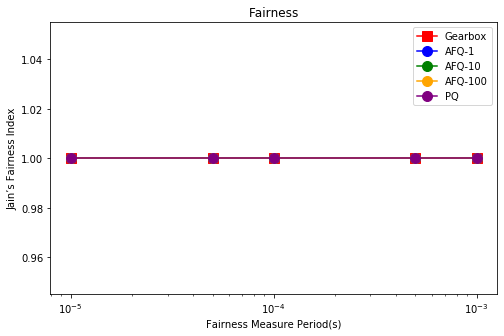

In [40]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 2 - two flow 

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in lege

[0.69602167382881175, 0.9794837361140335, 0.98028745743805179, 0.98100301430677816, 0.98062631194545646]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.


[0.97676105609979547, 0.98162182522065633, 0.9815469238267075, 0.98221842477027688, 0.9817351535791925]


/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.75333570627285251, 0.95582088632636053, 0.97728314813129114, 0.97769140523901721, 0.97751373204358638]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.51018838275412493, 0.86031231016091969, 0.97572071209858646, 0.97673148935921439, 0.97664416112851238]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.97676105609979547, 0.98162182522065633, 0.9815469238267075, 0.98221842477027688, 0.9817351535791925]


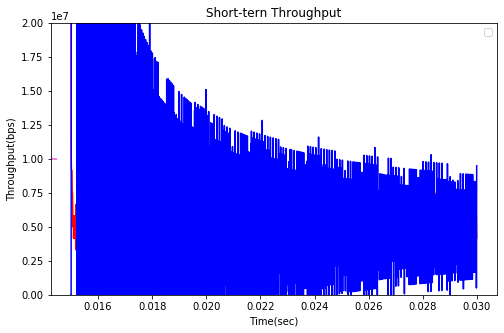

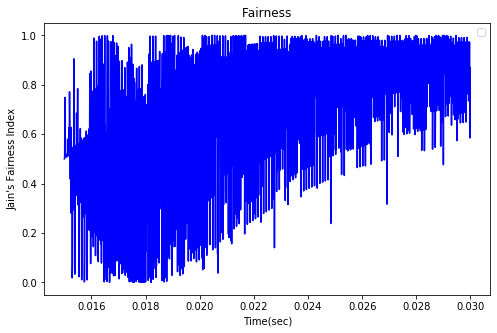

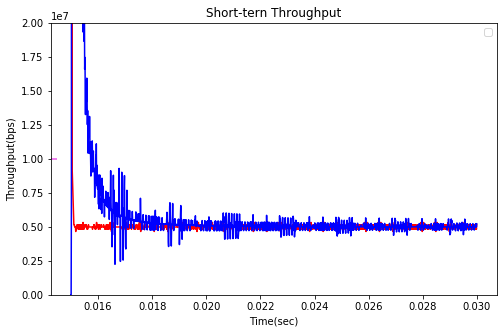

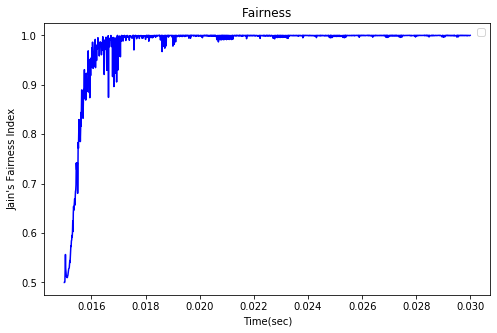

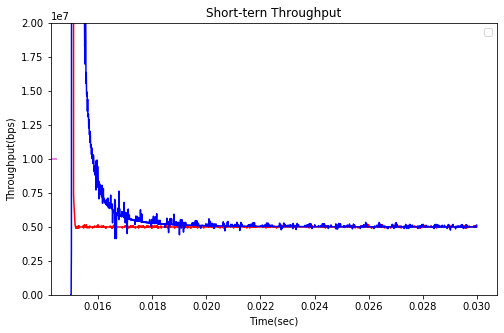

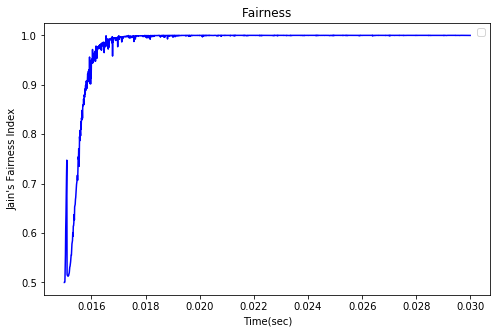

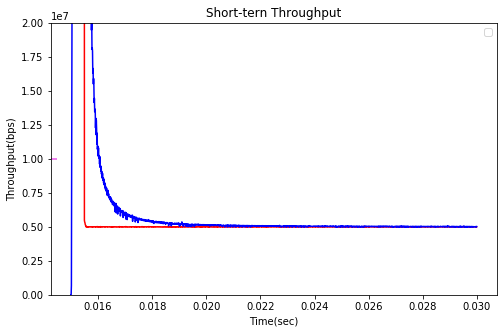

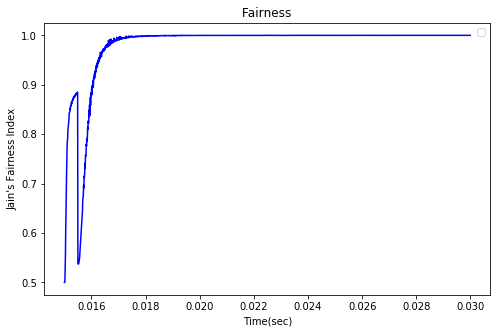

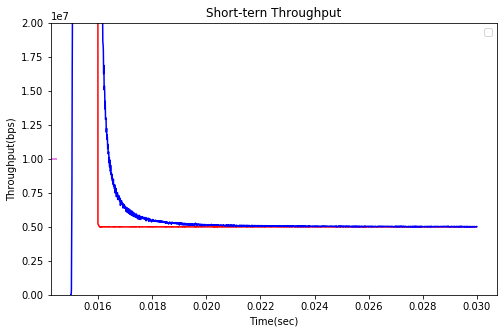

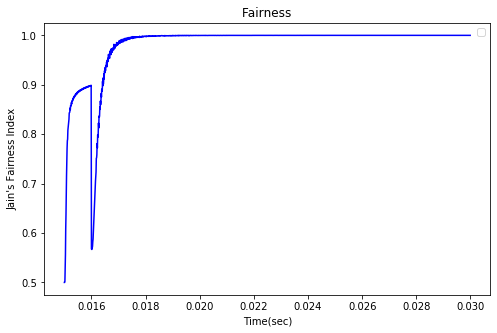

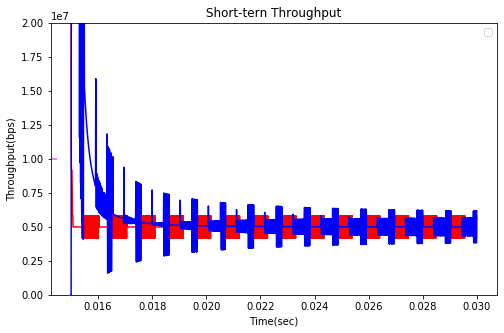

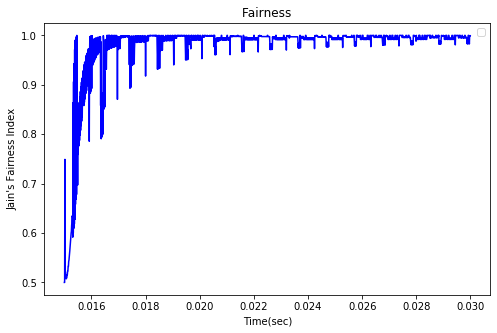

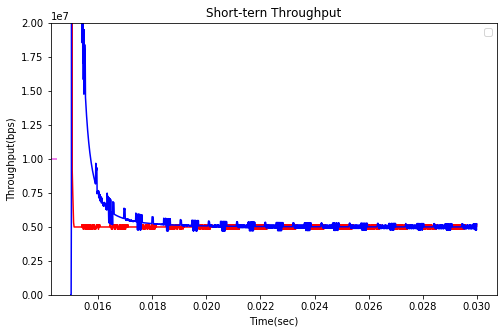

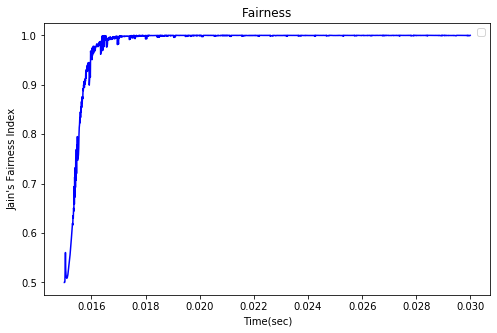

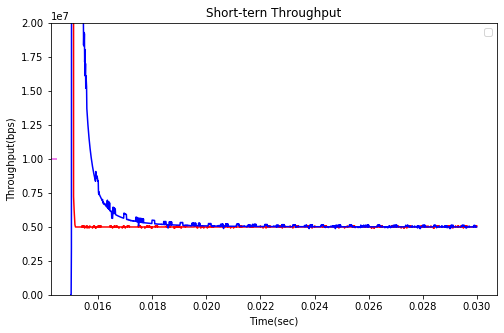

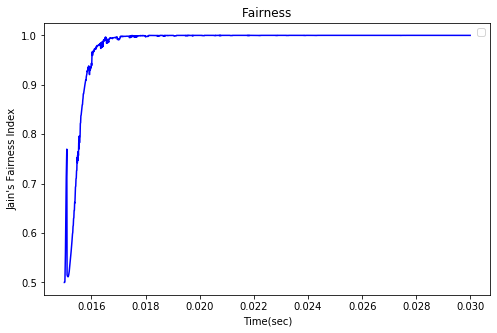

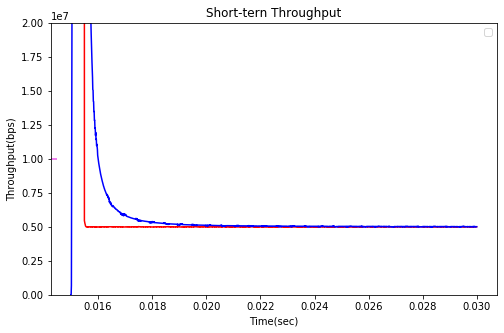

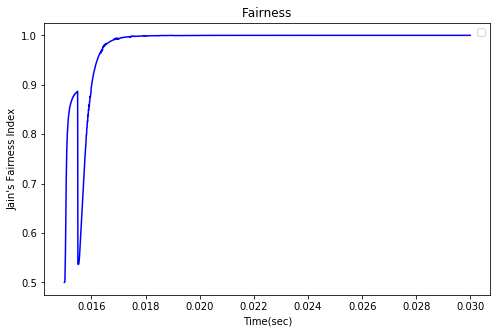

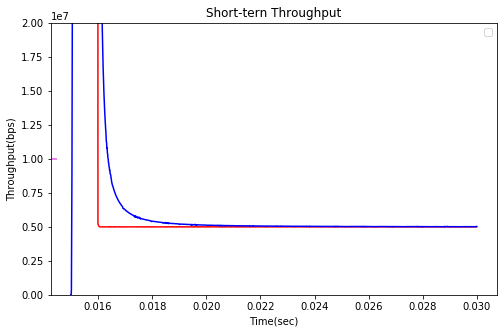

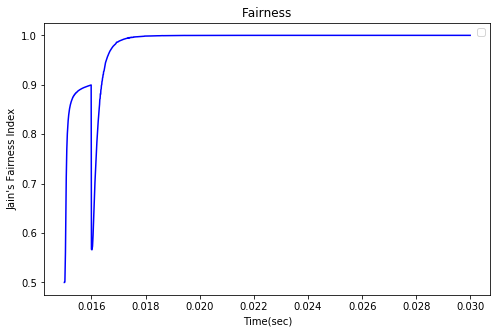

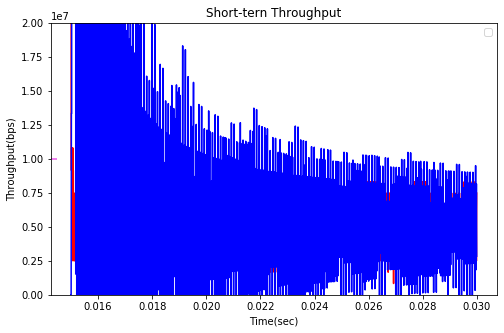

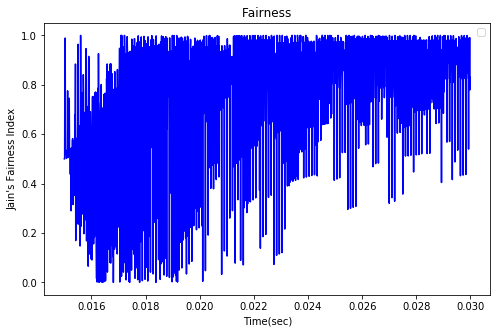

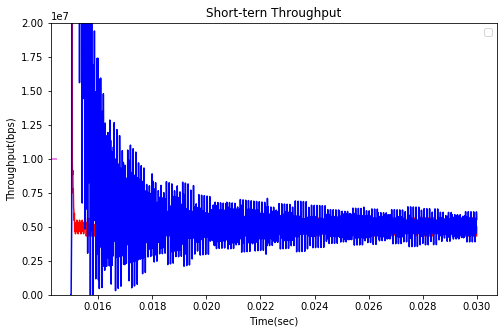

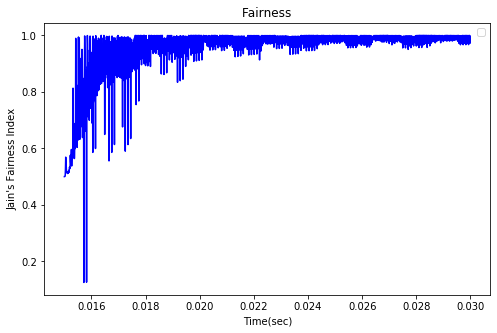

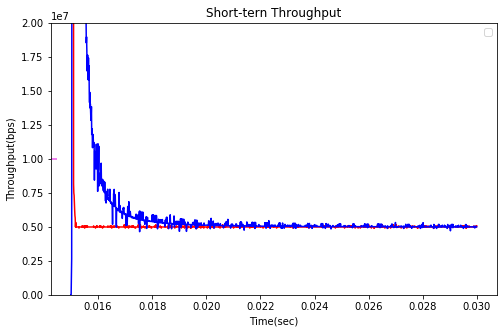

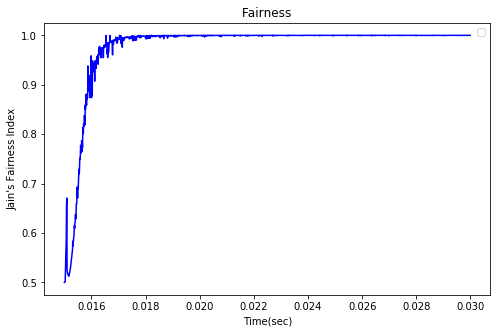

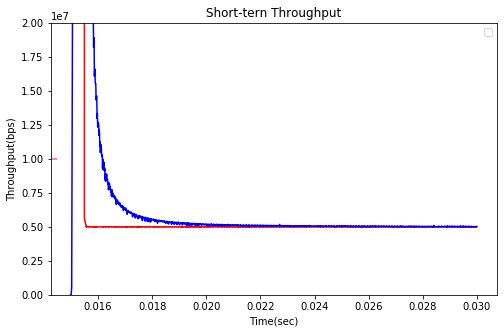

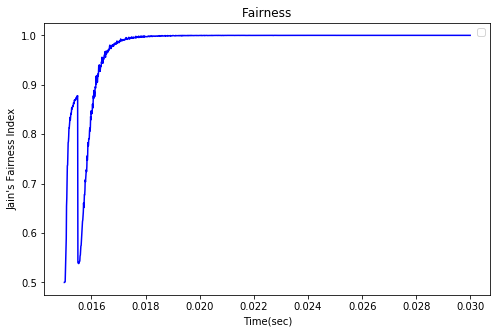

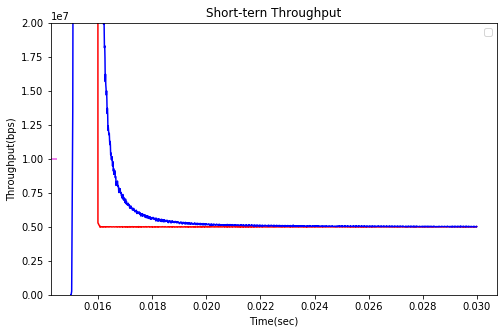

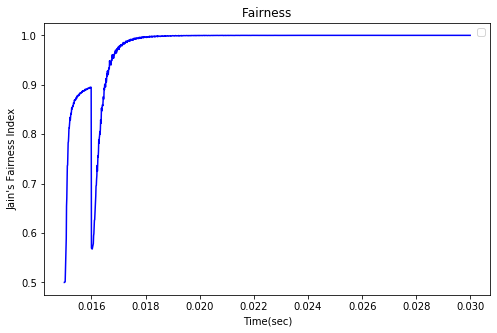

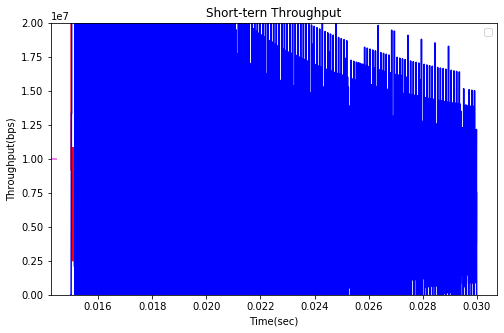

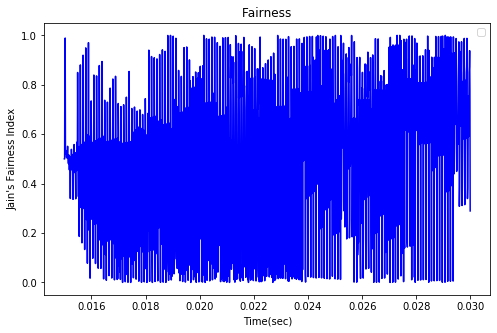

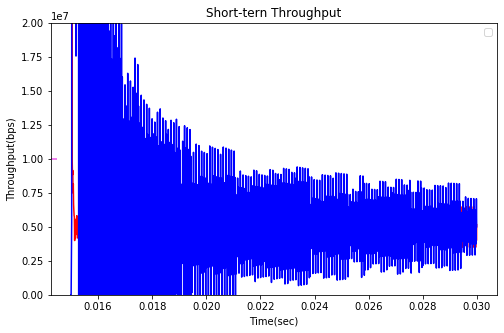

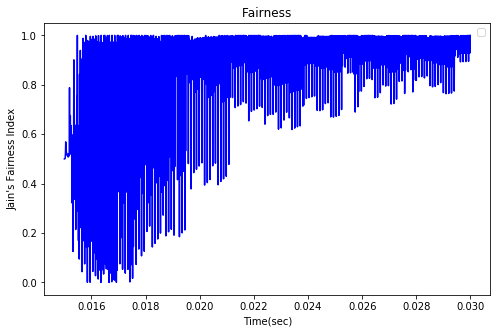

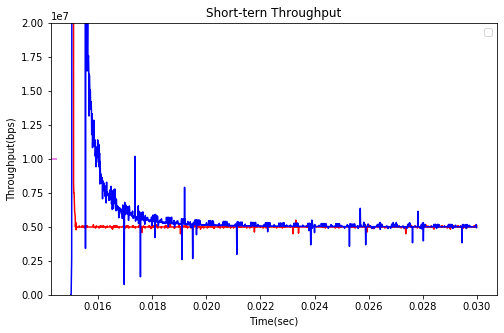

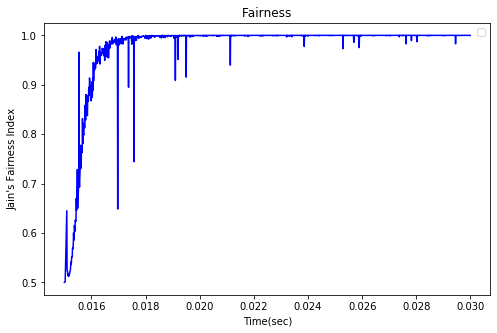

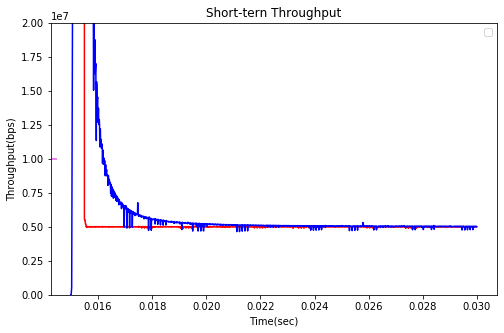

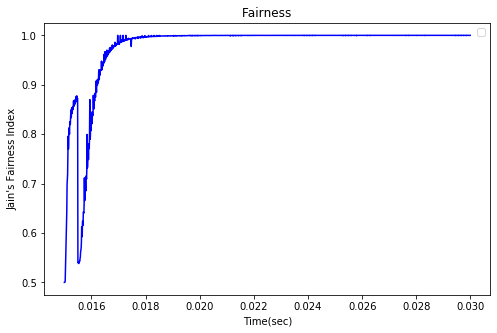

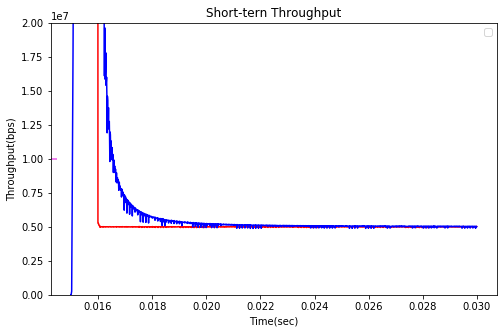

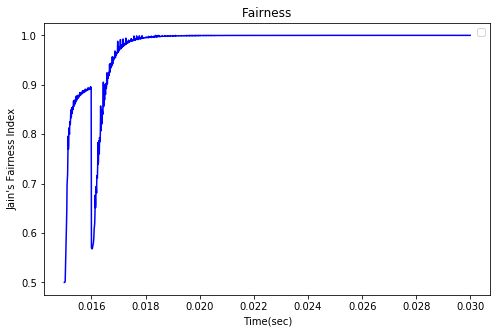

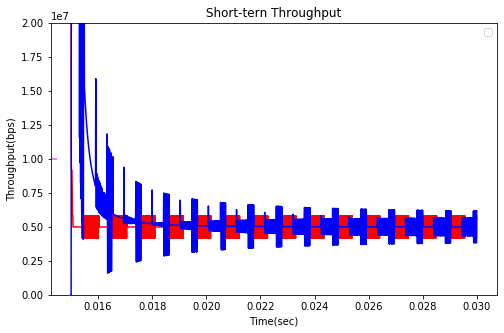

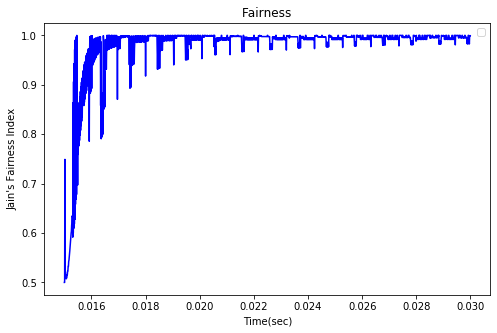

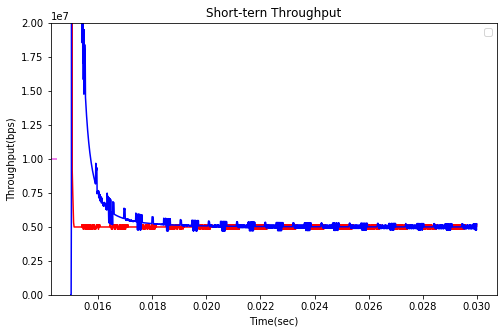

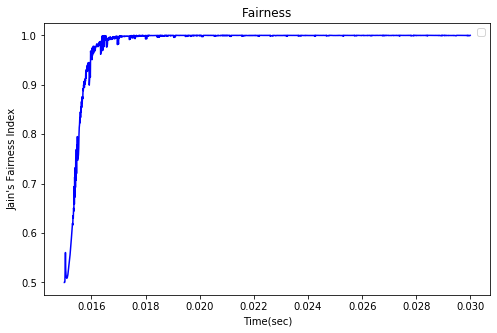

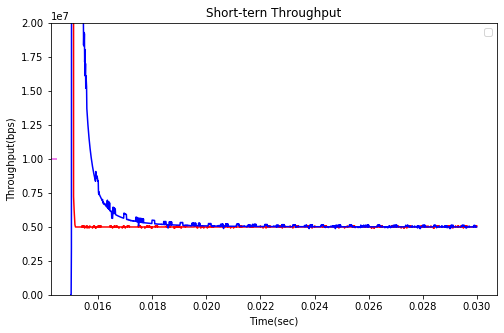

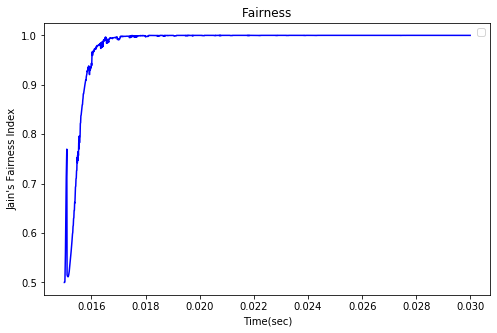

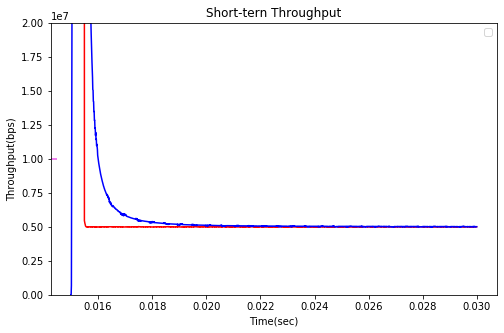

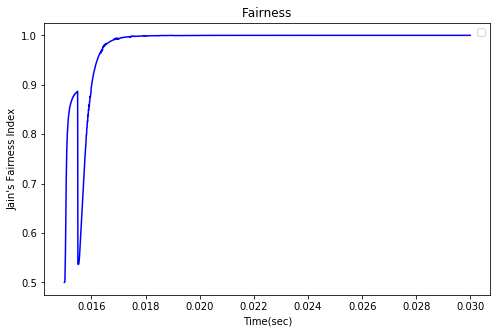

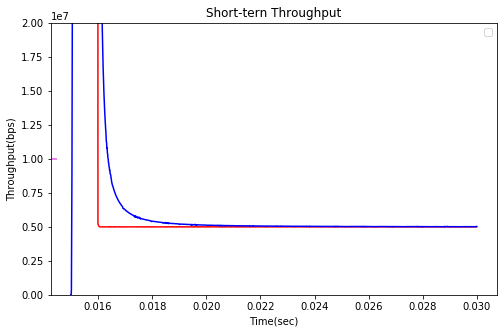

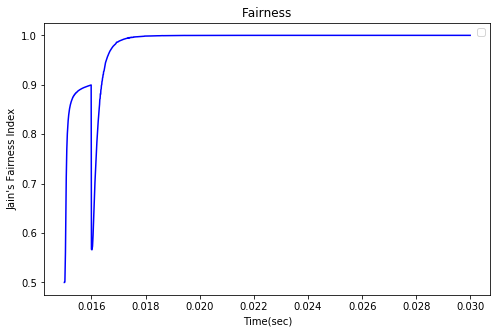

In [41]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.015) & (raw_data_0_HCS['Timestamp'] < 0.03)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.015) & (raw_data_1_HCS['Timestamp'] < 0.03)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.015) & (raw_data_0_AFQ10['Timestamp'] < 0.03)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.015) & (raw_data_1_AFQ10['Timestamp'] < 0.03)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.015) & (raw_data_0_AFQ100['Timestamp'] < 0.03)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.015) & (raw_data_1_AFQ100['Timestamp'] < 0.03)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.015) & (raw_data_0_AFQ1000['Timestamp'] < 0.03)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.015) & (raw_data_1_AFQ1000['Timestamp'] < 0.03)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.015) & (raw_data_0_PQ['Timestamp'] < 0.03)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.015) & (raw_data_1_PQ['Timestamp'] < 0.03)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

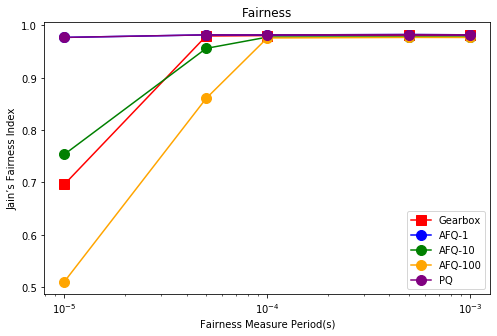

In [42]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 3 - three flow

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

[0.43823914311063378, 0.94073839468911435, 0.94579535154749417, 0.94990400613751447, 0.95257143192754168]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.


[0.93204640124557969, 0.94676793367541179, 0.94747652690006456, 0.95118547542236653, 0.95381254049284747]


/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.65916002181623135, 0.92525254574072624, 0.93119282358389499, 0.93501743940700965, 0.93845782537708267]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.22533918243116591, 0.89890422685904592, 0.91619995793756726, 0.92200849034980215, 0.92582134695374529]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.93204640124557969, 0.94676793367541179, 0.94747652690006456, 0.95118547542236653, 0.95381254049284747]


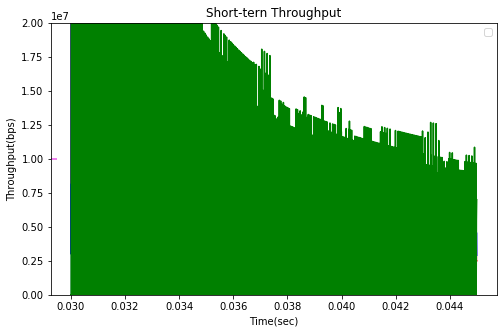

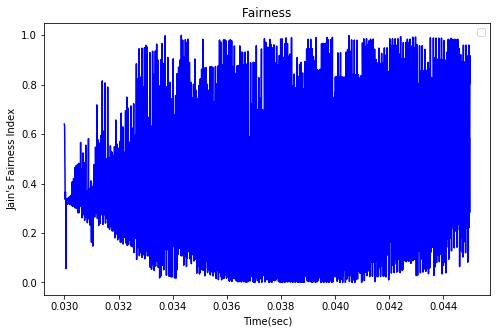

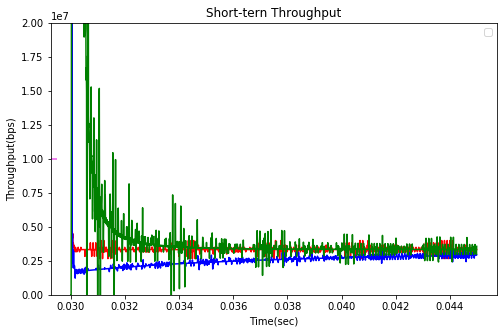

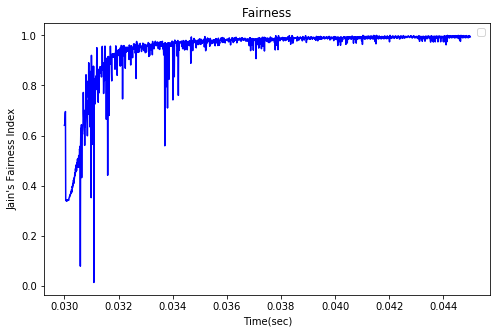

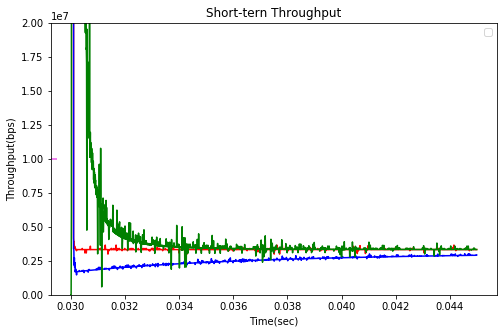

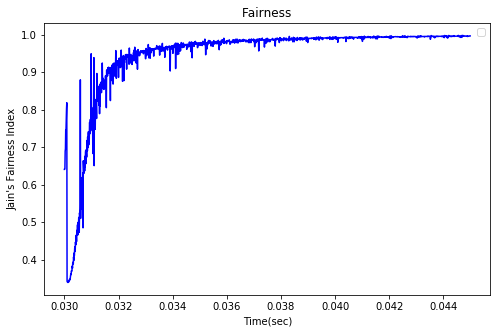

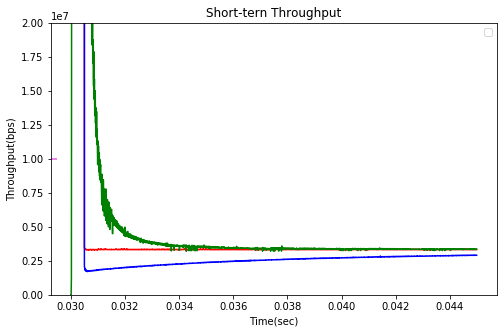

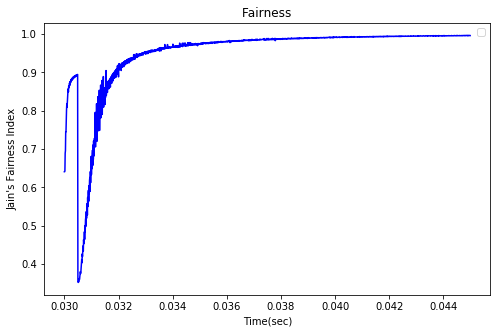

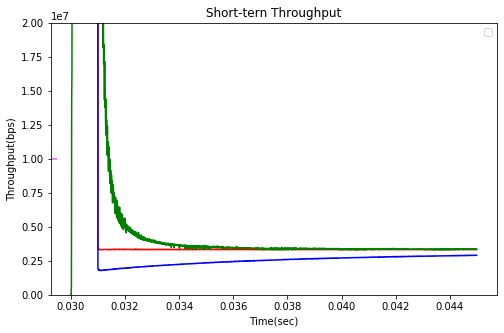

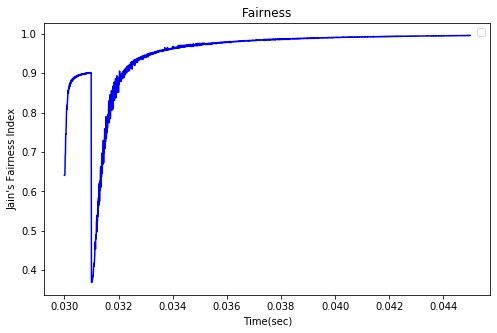

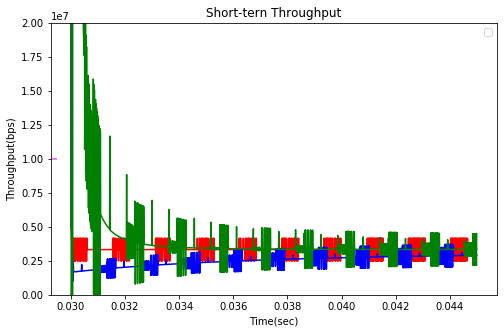

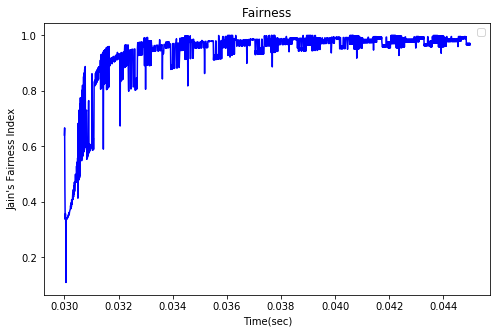

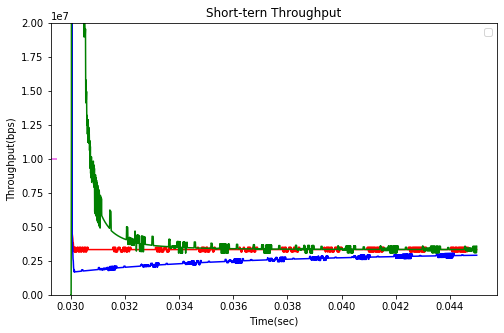

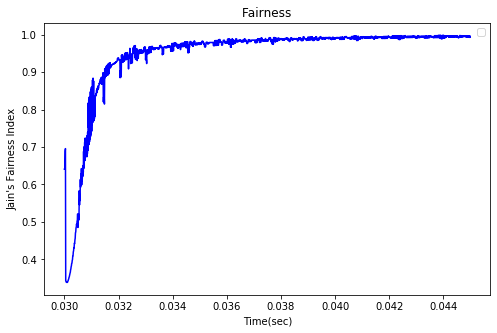

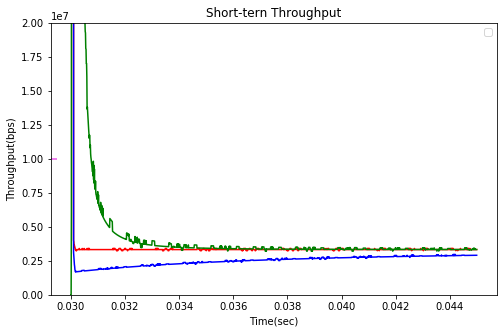

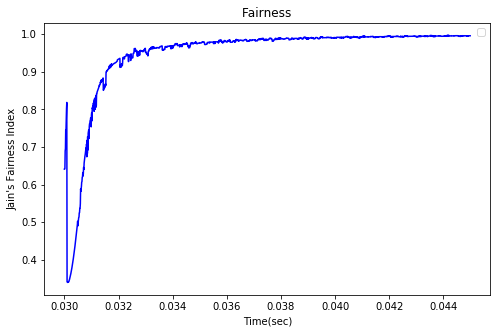

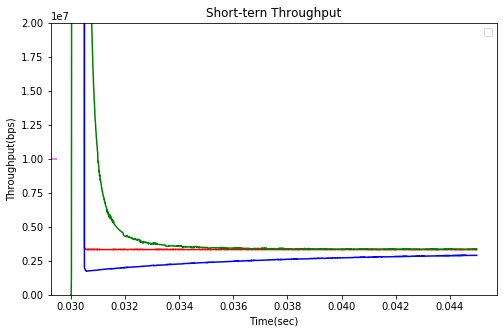

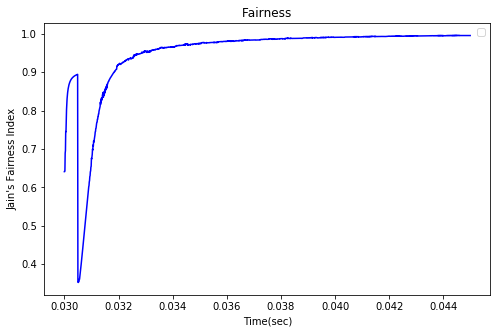

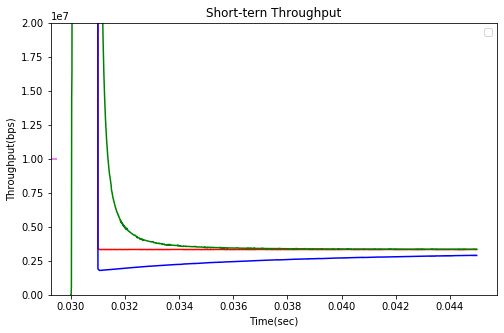

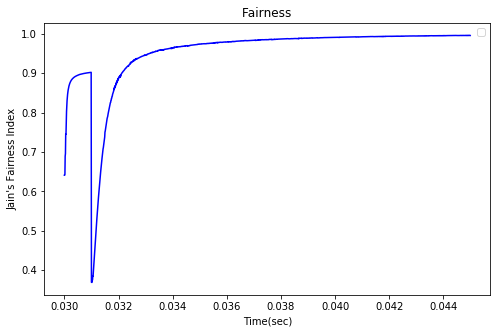

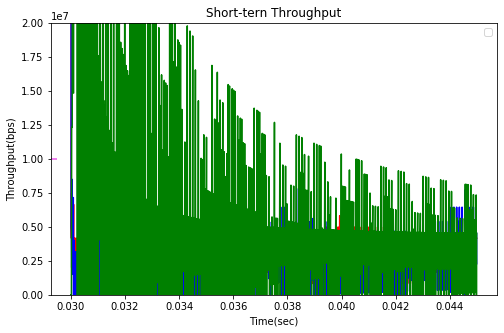

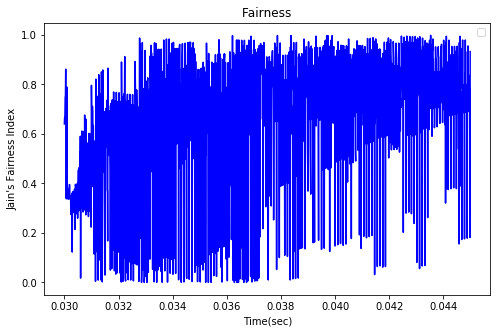

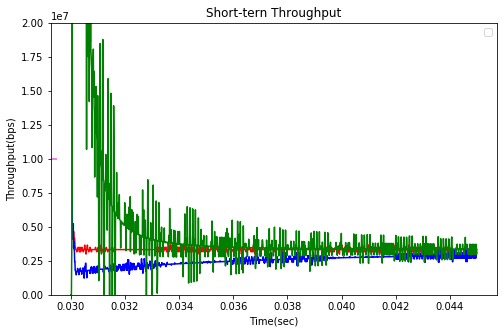

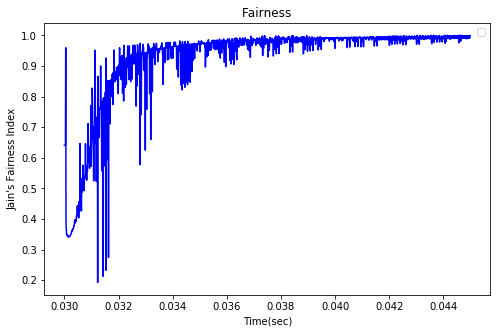

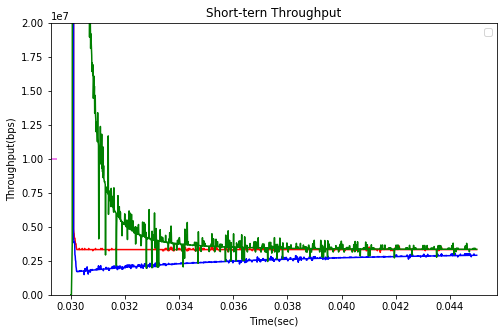

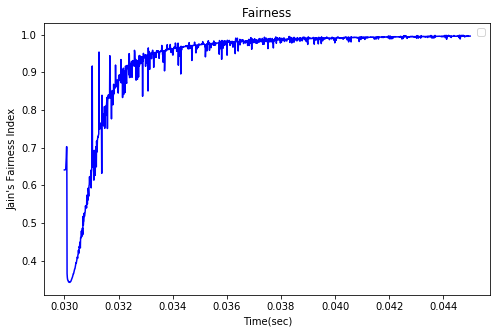

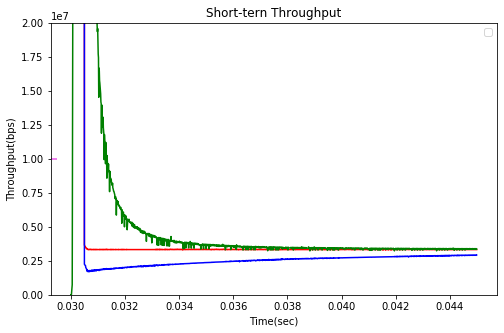

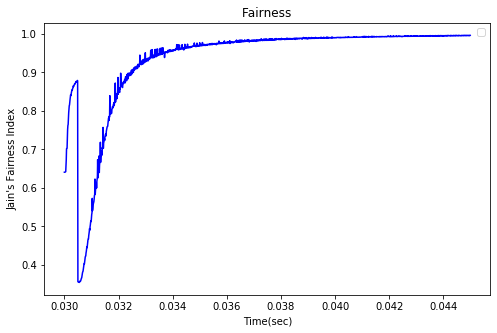

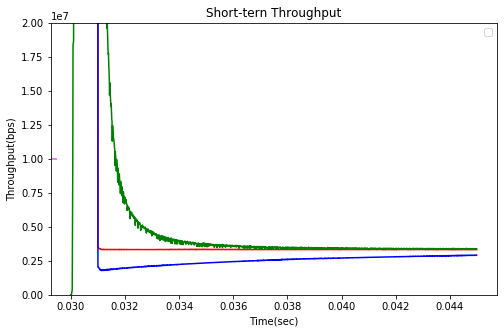

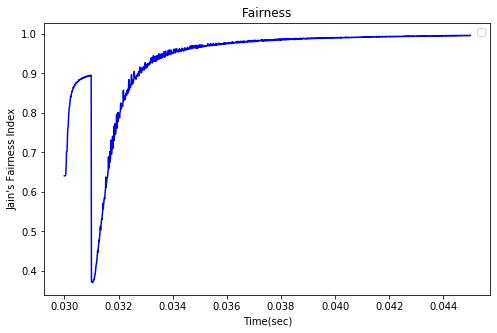

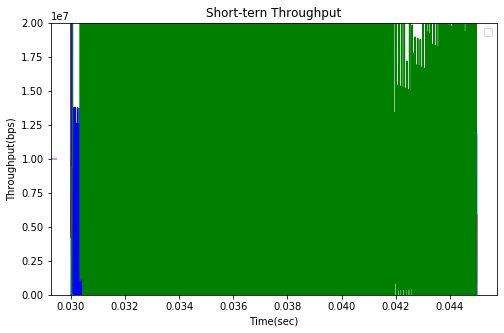

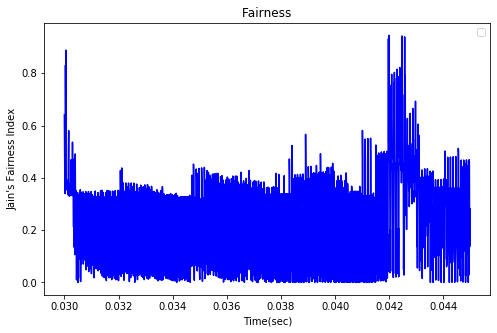

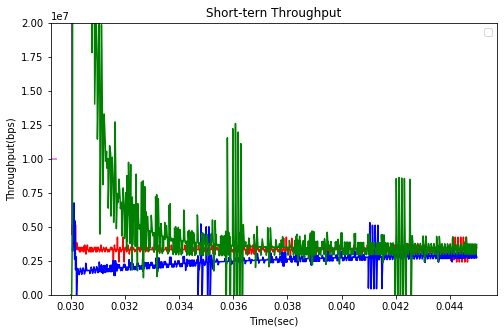

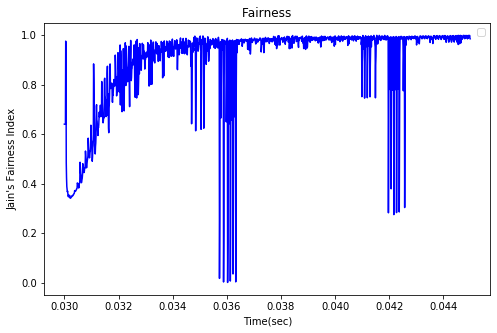

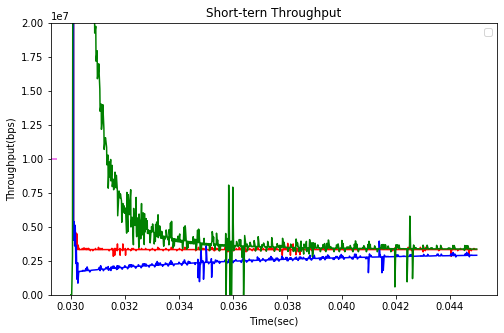

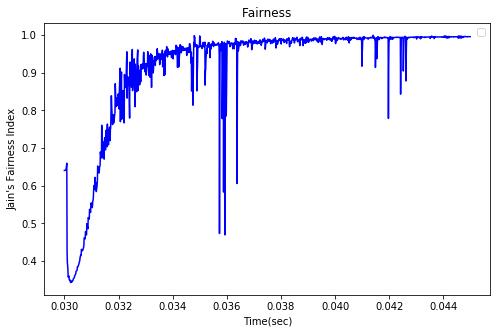

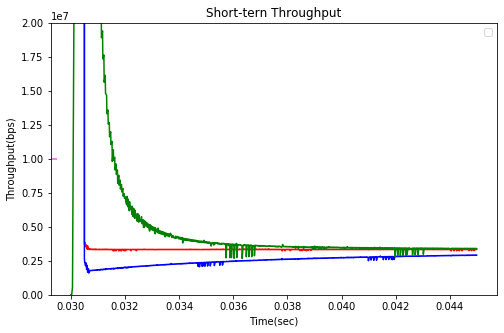

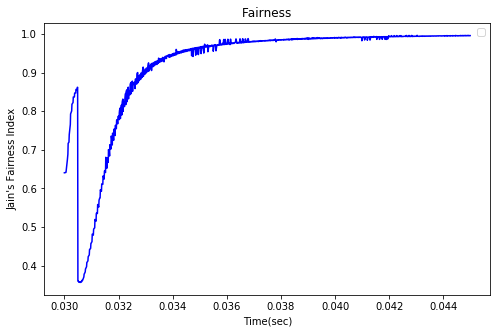

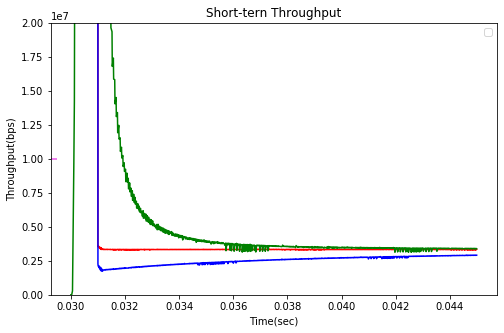

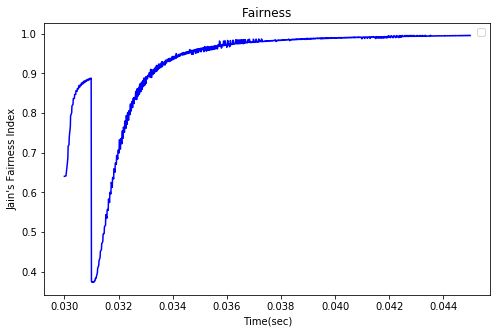

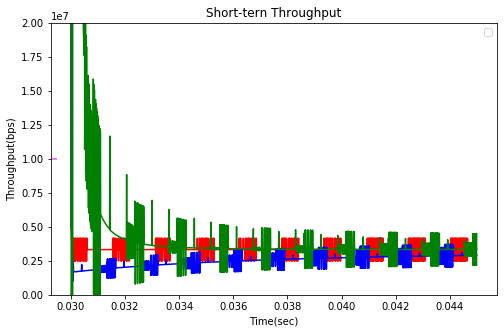

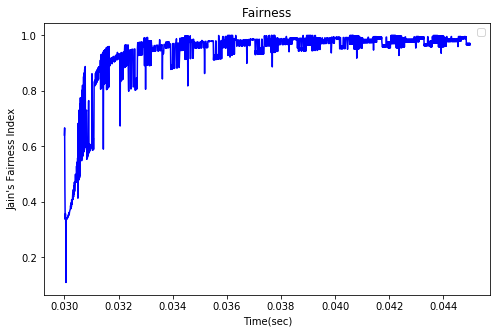

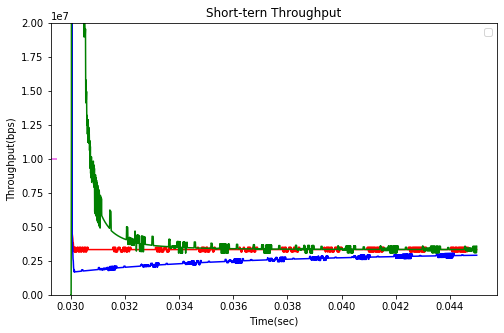

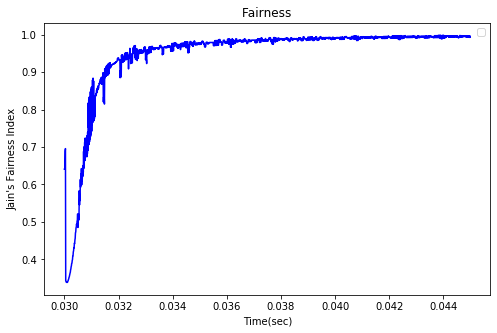

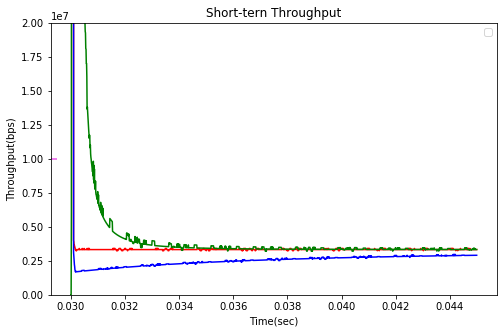

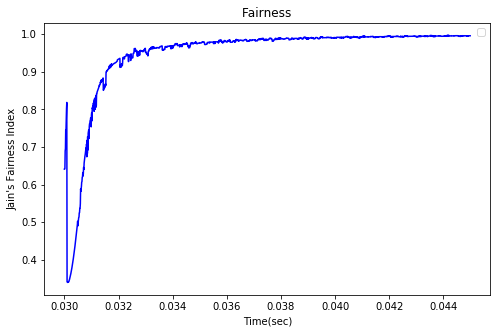

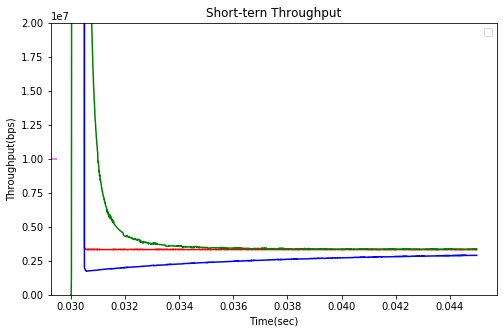

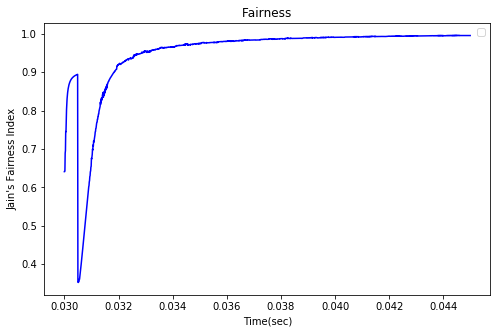

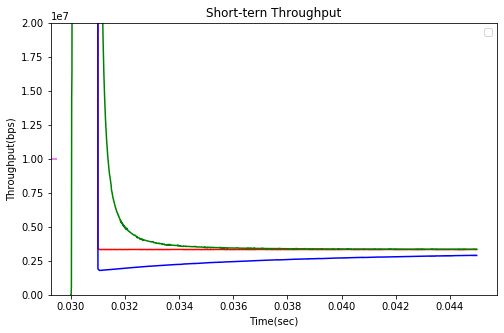

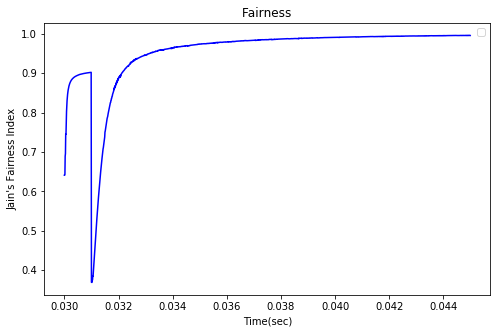

In [43]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.03) & (raw_data_0_HCS['Timestamp'] < 0.045)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.03) & (raw_data_1_HCS['Timestamp'] < 0.045)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.03) & (raw_data_2_HCS['Timestamp'] < 0.045)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.03) & (raw_data_0_AFQ10['Timestamp'] < 0.045)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.03) & (raw_data_1_AFQ10['Timestamp'] < 0.045)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.03) & (raw_data_2_AFQ10['Timestamp'] < 0.045)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.03) & (raw_data_0_AFQ100['Timestamp'] < 0.045)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.03) & (raw_data_1_AFQ100['Timestamp'] < 0.045)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.03) & (raw_data_2_AFQ100['Timestamp'] < 0.045)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.03) & (raw_data_0_AFQ1000['Timestamp'] < 0.045)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.03) & (raw_data_1_AFQ1000['Timestamp'] < 0.045)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.03) & (raw_data_2_AFQ1000['Timestamp'] < 0.045)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.03) & (raw_data_0_PQ['Timestamp'] < 0.045)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.03) & (raw_data_1_PQ['Timestamp'] < 0.045)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.03) & (raw_data_2_PQ['Timestamp'] < 0.045)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

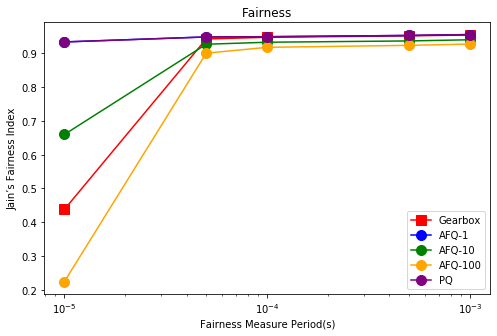

In [44]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 4 - four flow

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

[0.40947325454947792, 0.65976753853961601, 0.92170960184187911, 0.92738659903359533, 0.9316756695684999]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.90141694863386568, 0.92249563932838907, 0.92360868909870286, 0.92872537819988599, 0.93293732136789431]


/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put

[0.54995059276890079, 0.87739756393501966, 0.90035319584186357, 0.90886455740985228, 0.91405125016531652]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.13798561572715601, 0.46657455316291557, 0.5952428376166119, 0.86435665553880014, 0.87957408904085088]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.90141694863386568, 0.92249563932838907, 0.92360868909870286, 0.92872537819988599, 0.93293732136789431]


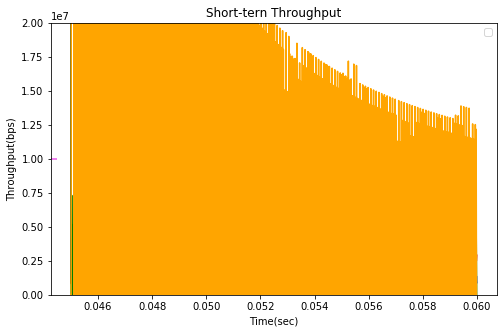

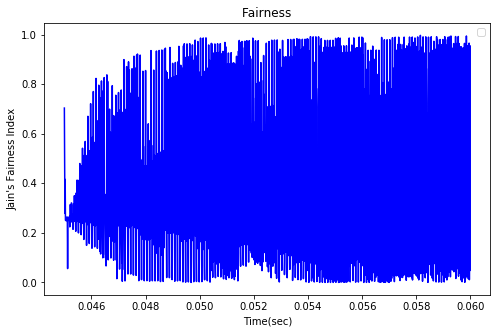

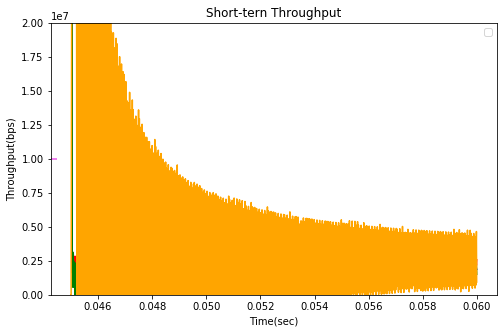

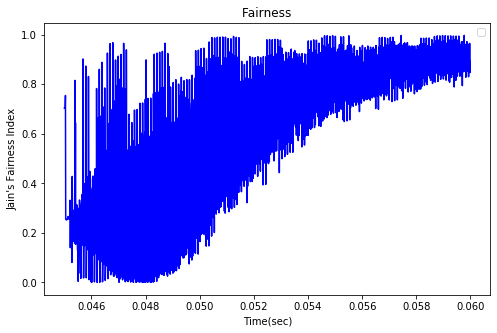

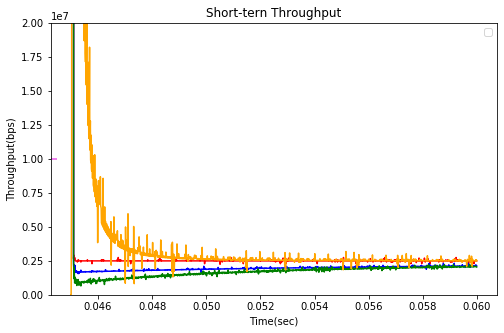

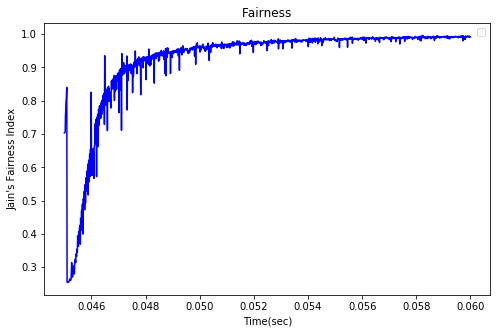

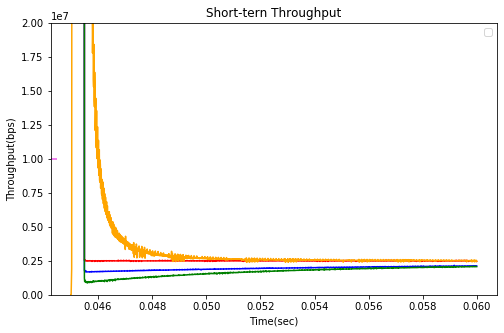

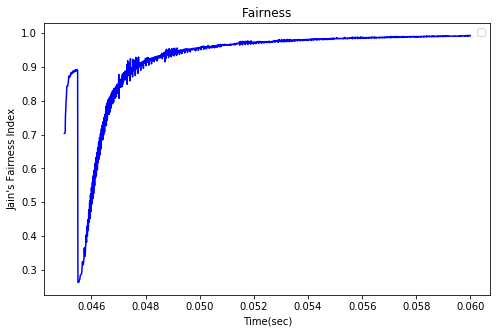

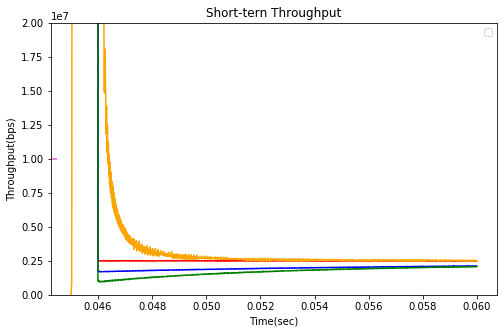

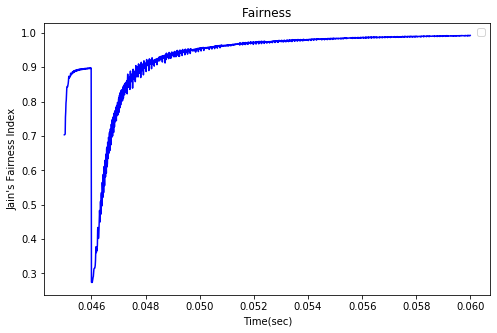

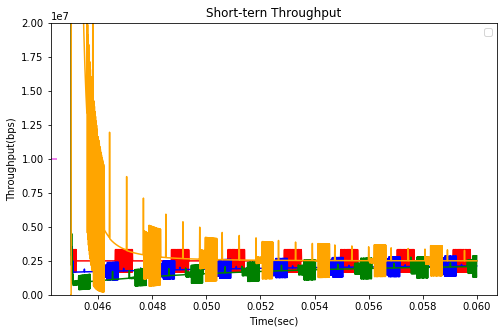

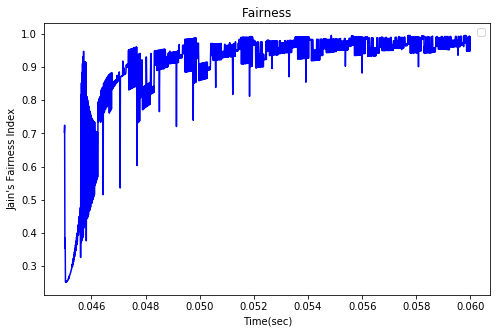

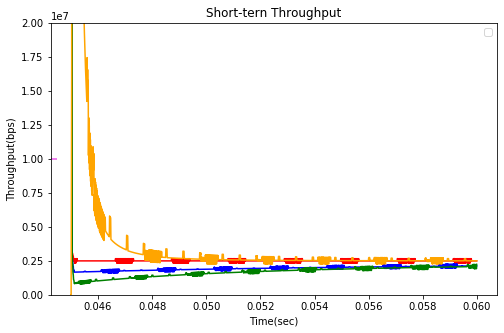

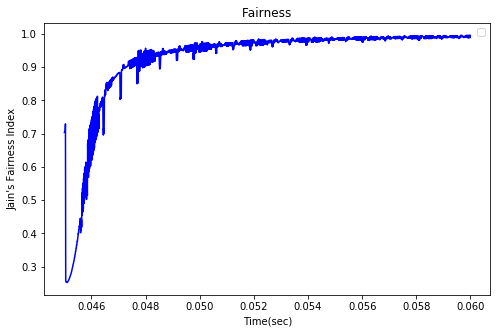

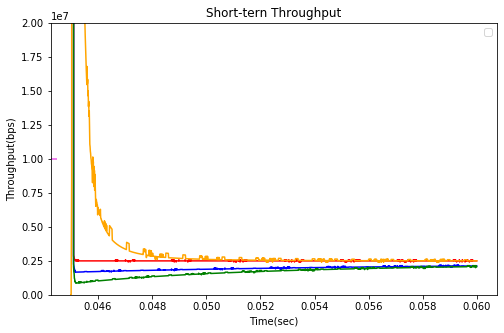

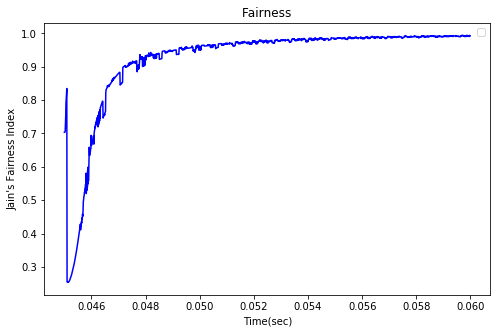

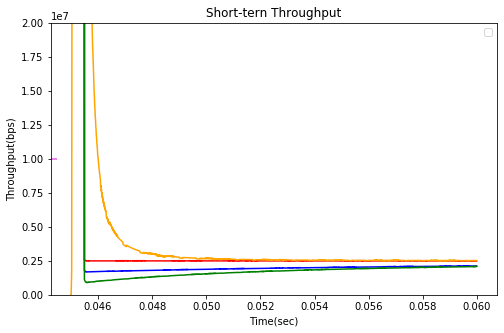

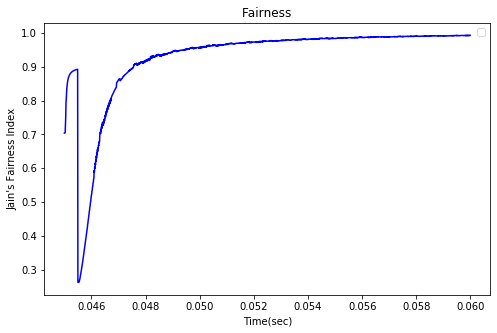

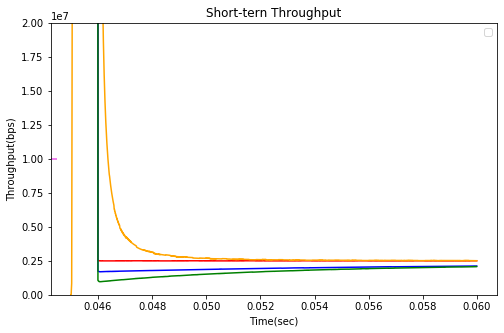

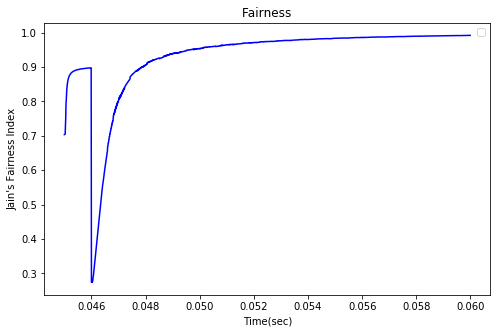

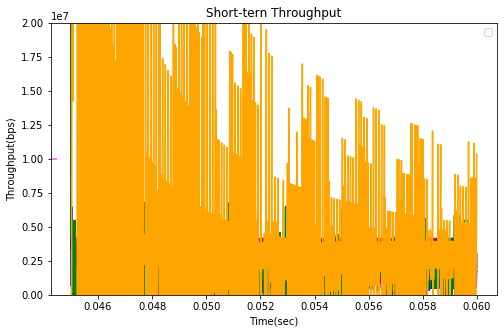

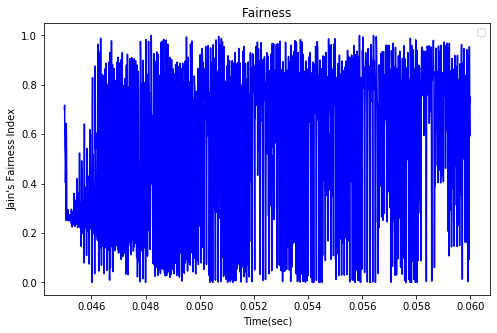

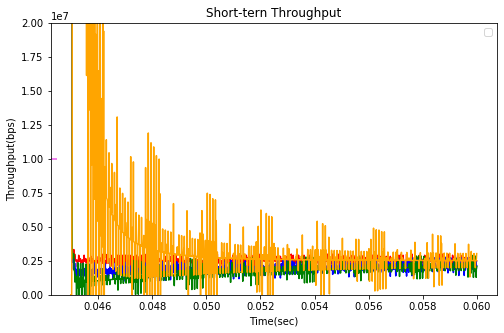

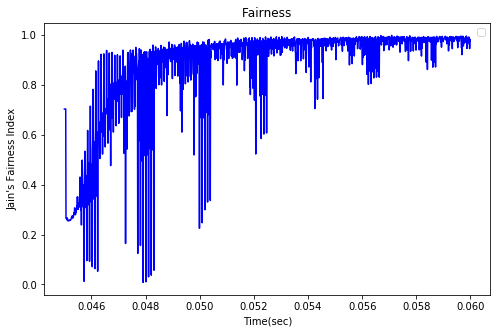

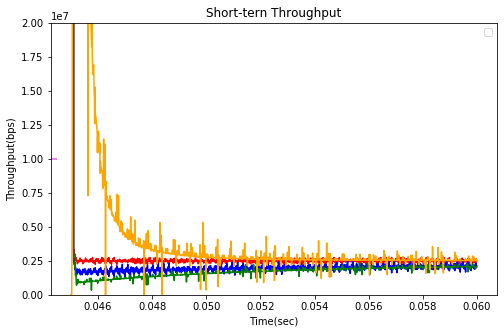

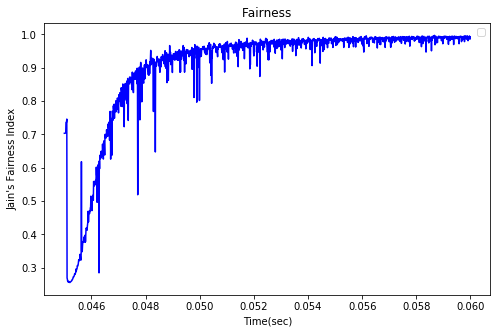

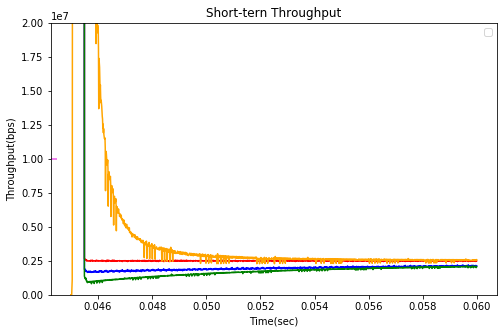

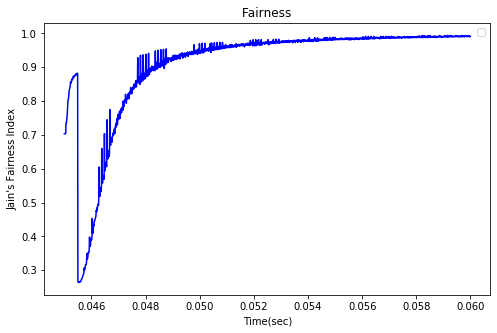

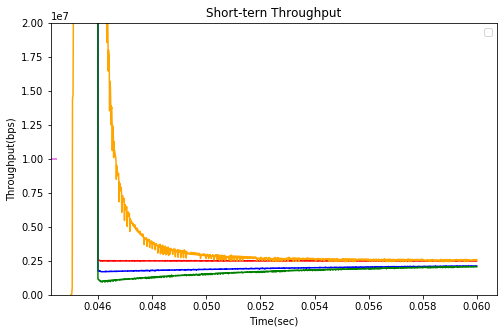

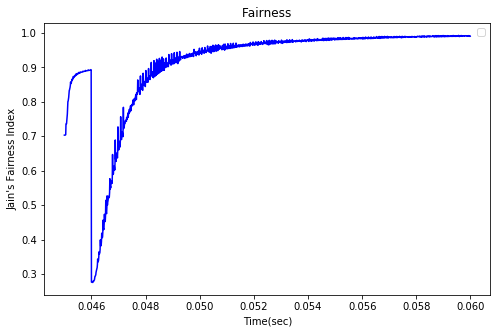

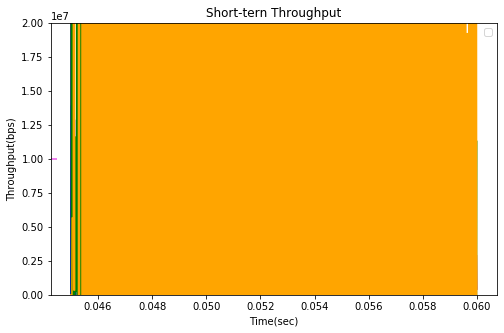

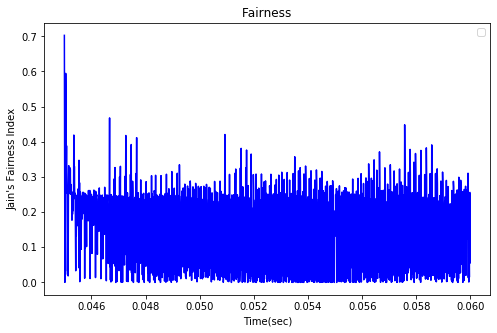

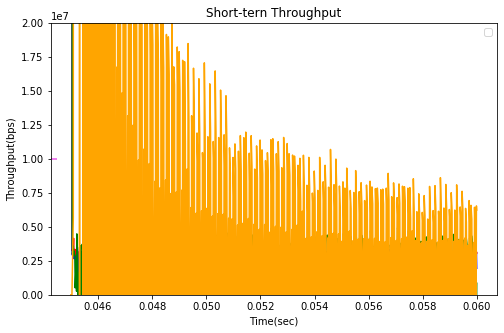

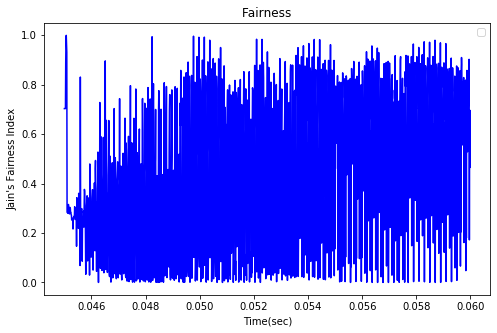

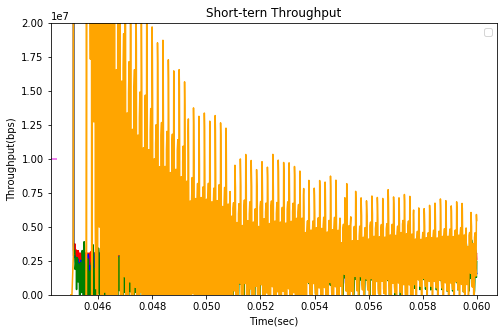

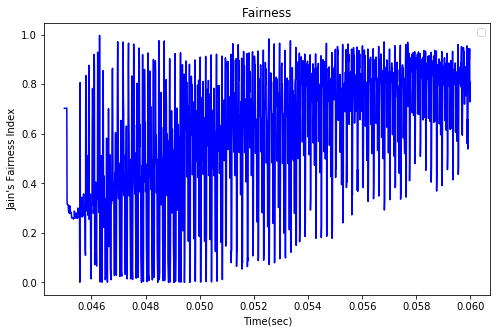

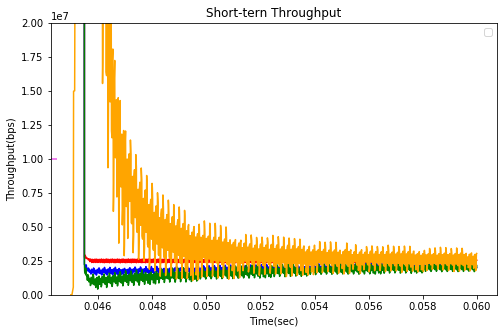

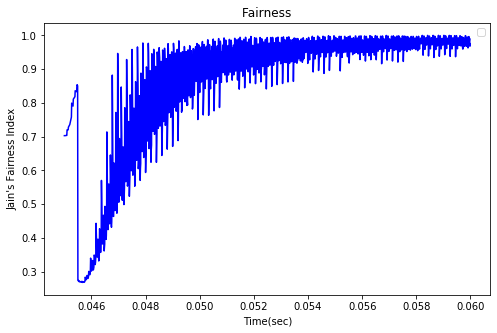

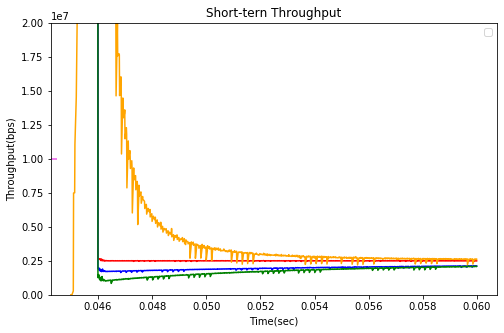

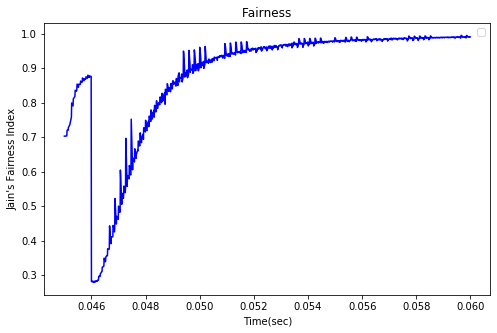

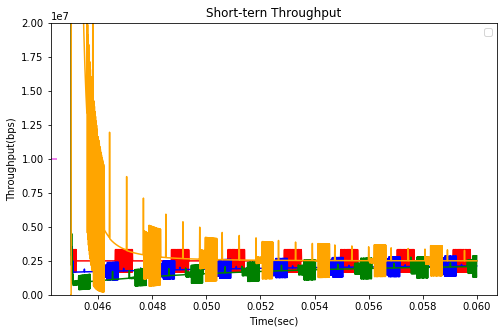

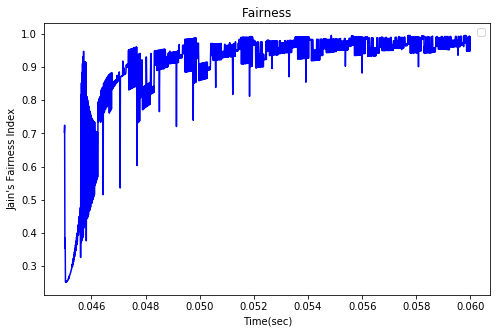

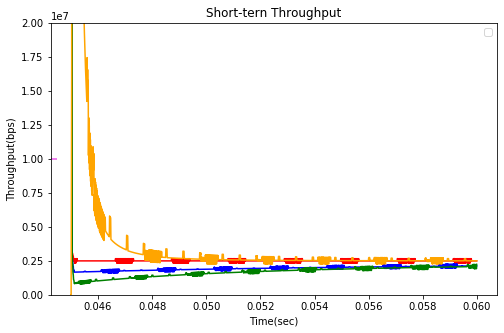

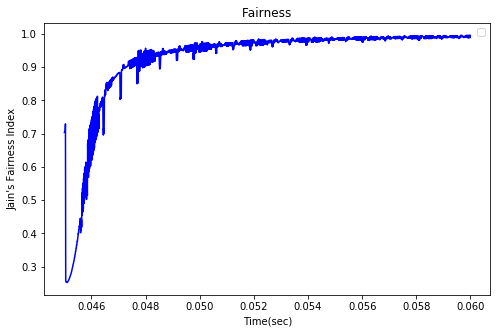

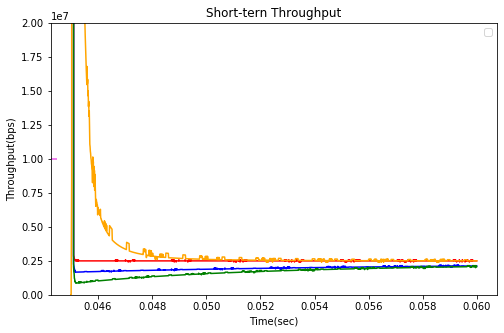

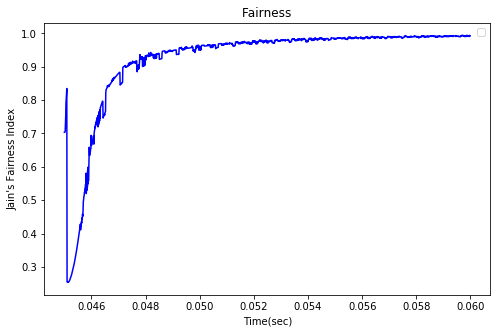

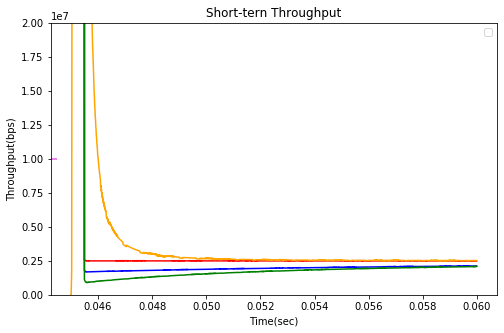

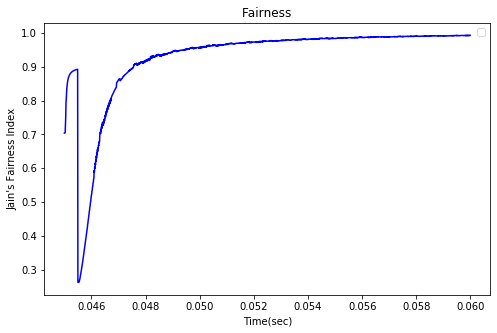

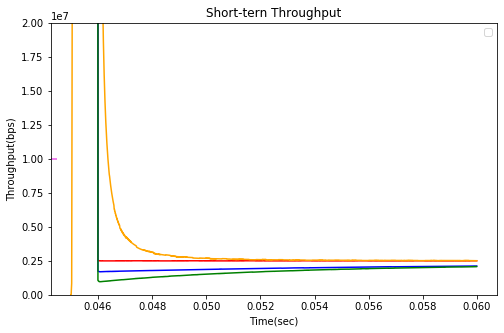

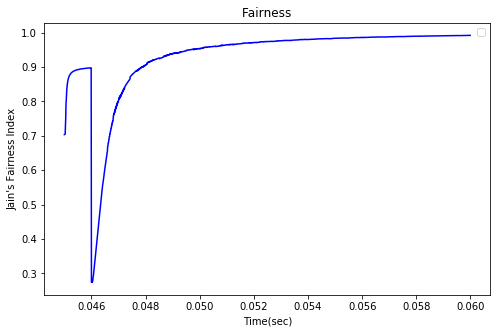

In [45]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.045) & (raw_data_0_HCS['Timestamp'] < 0.06)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.045) & (raw_data_1_HCS['Timestamp'] < 0.06)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.045) & (raw_data_2_HCS['Timestamp'] < 0.06)], raw_data_3_HCS[(raw_data_3_HCS['Timestamp'] >= 0.045) & (raw_data_3_HCS['Timestamp'] < 0.06)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.045) & (raw_data_0_AFQ10['Timestamp'] < 0.06)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.045) & (raw_data_1_AFQ10['Timestamp'] < 0.06)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.045) & (raw_data_2_AFQ10['Timestamp'] < 0.06)], raw_data_3_AFQ10[(raw_data_3_AFQ10['Timestamp'] >= 0.045) & (raw_data_3_AFQ10['Timestamp'] < 0.06)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.045) & (raw_data_0_AFQ100['Timestamp'] < 0.06)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.045) & (raw_data_1_AFQ100['Timestamp'] < 0.06)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.045) & (raw_data_2_AFQ100['Timestamp'] < 0.06)], raw_data_3_AFQ100[(raw_data_3_AFQ100['Timestamp'] >= 0.045) & (raw_data_3_AFQ100['Timestamp'] < 0.06)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.045) & (raw_data_0_AFQ1000['Timestamp'] < 0.06)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.045) & (raw_data_1_AFQ1000['Timestamp'] < 0.06)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.045) & (raw_data_2_AFQ1000['Timestamp'] < 0.06)], raw_data_3_AFQ1000[(raw_data_3_AFQ1000['Timestamp'] >= 0.045) & (raw_data_3_AFQ1000['Timestamp'] < 0.06)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_four_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.045) & (raw_data_0_PQ['Timestamp'] < 0.06)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.045) & (raw_data_1_PQ['Timestamp'] < 0.06)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.045) & (raw_data_2_PQ['Timestamp'] < 0.06)], raw_data_3_PQ[(raw_data_3_PQ['Timestamp'] >= 0.045) & (raw_data_3_PQ['Timestamp'] < 0.06)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

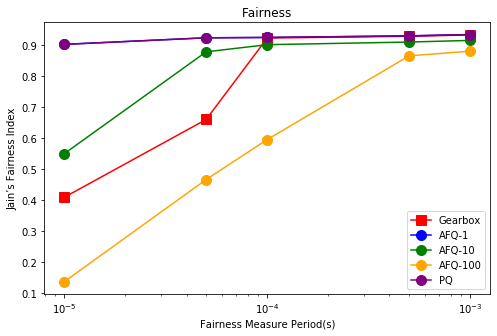

In [46]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 5 - three flow 

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

[0.77357879338058899, 0.99682790653265962, 0.99746900917820558, 0.99613730623402186, 0.99437201213229764]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.


[0.98763199387914713, 0.99739838023092608, 0.99753290349050927, 0.99614196160404511, 0.9943758349873848]


/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.88090515391420743, 0.99701555733592873, 0.99744014208480047, 0.99610557915927656, 0.99433050321956307]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.49464802949858033, 0.99208910284253138, 0.99659756721621562, 0.9960249040406719, 0.99427541479907933]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.98763199387914713, 0.99739838023092608, 0.99753290349050927, 0.99614196160404511, 0.9943758349873848]


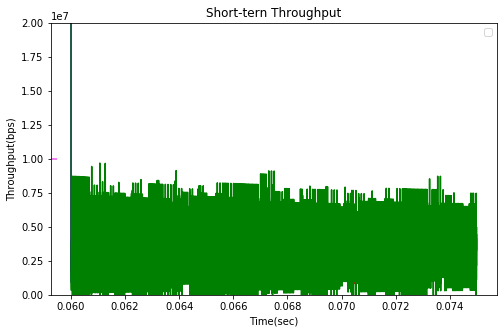

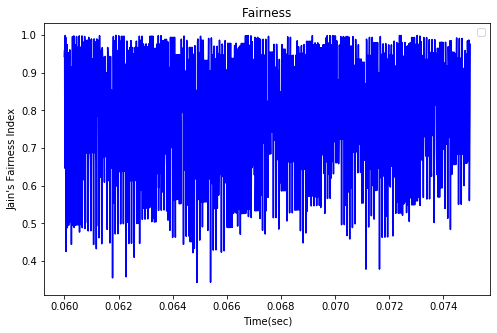

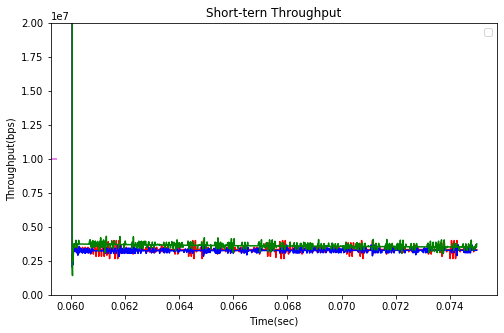

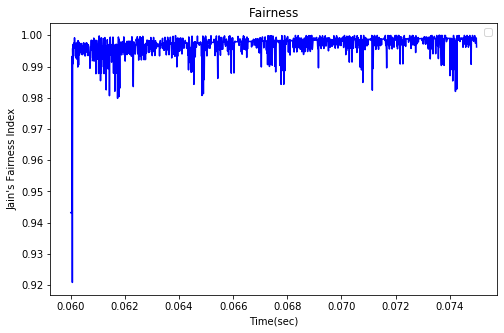

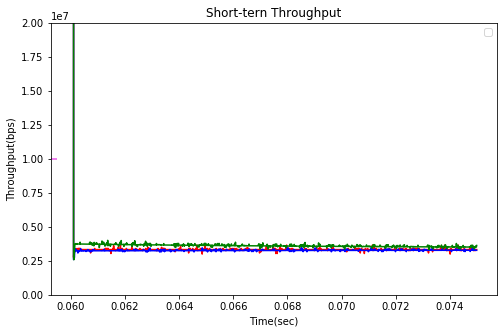

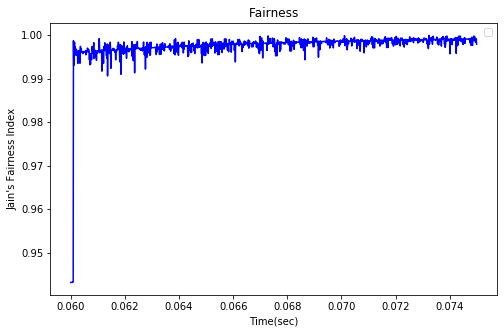

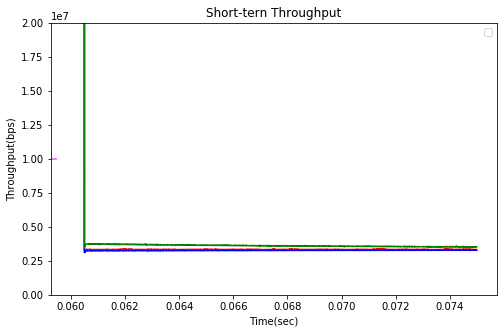

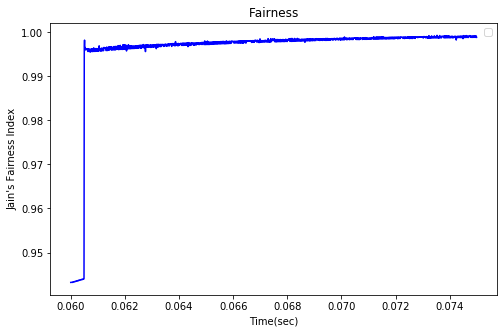

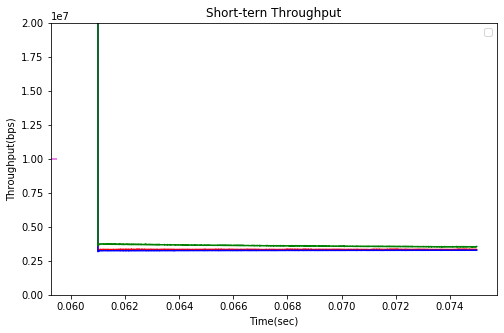

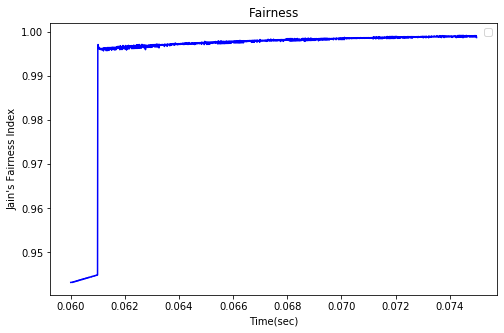

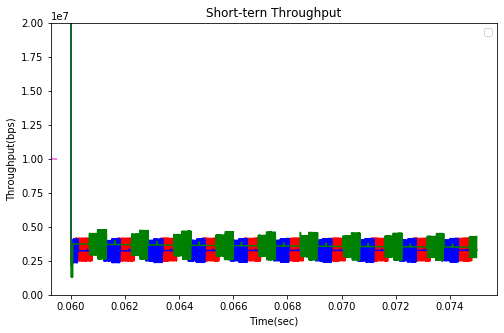

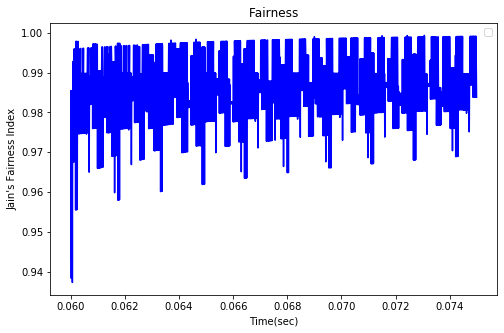

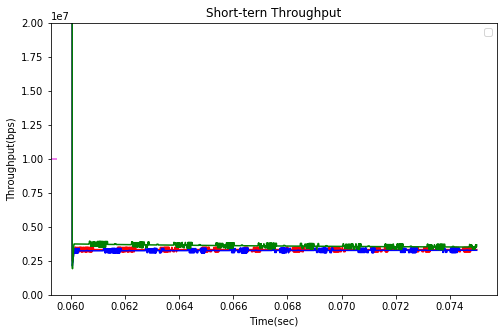

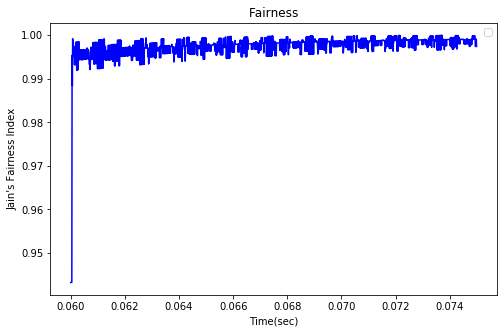

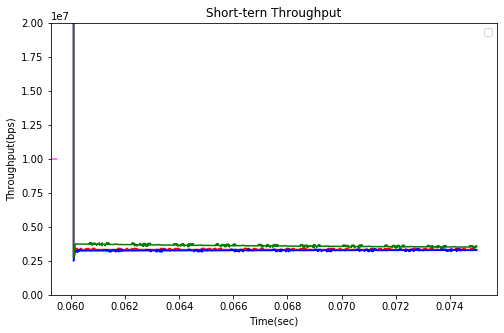

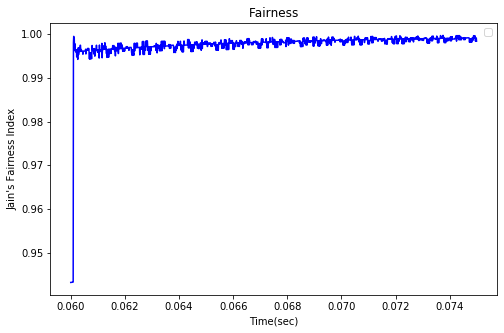

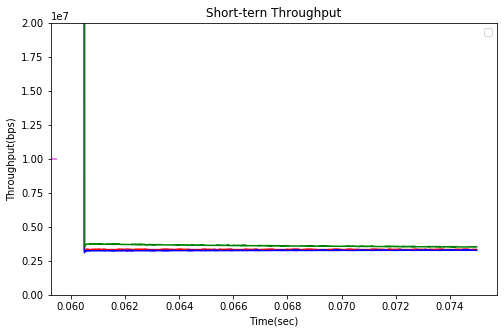

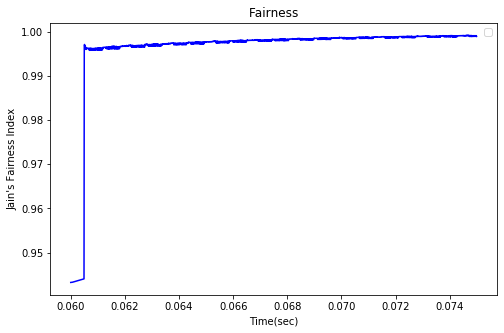

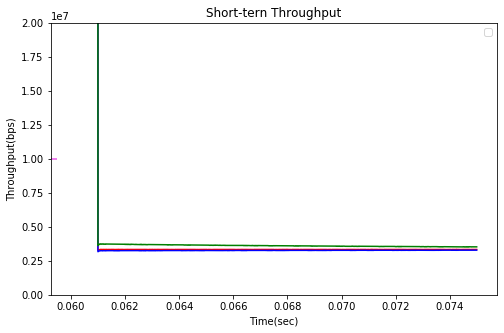

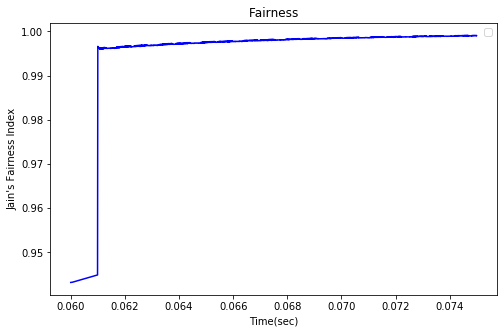

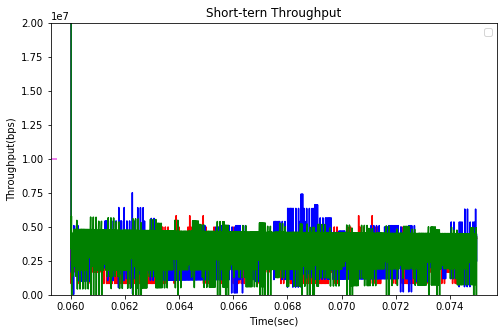

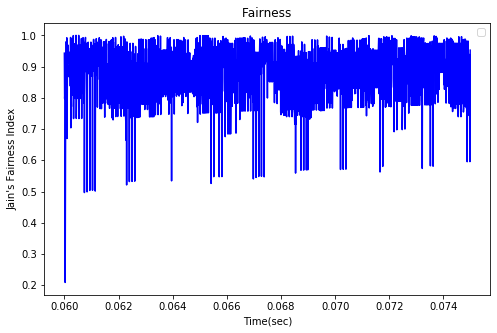

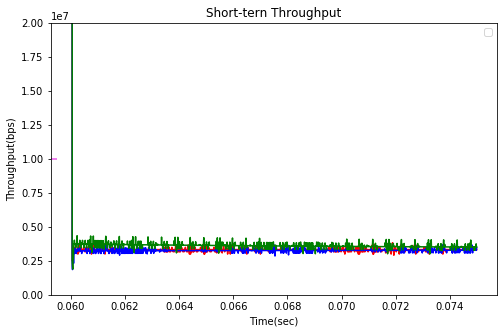

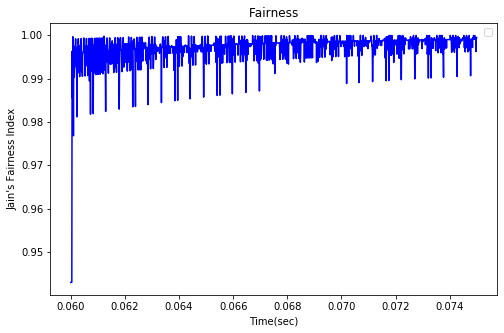

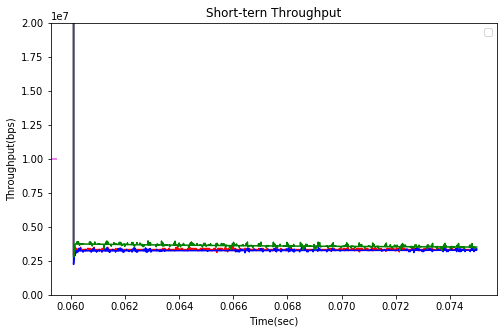

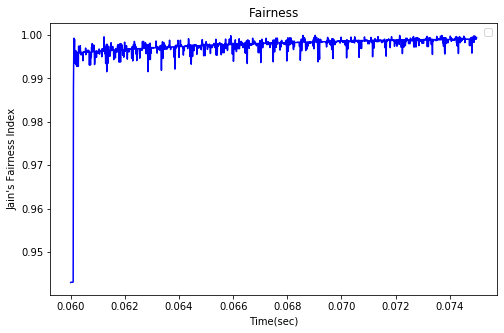

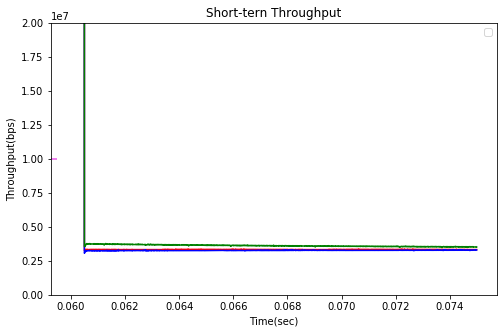

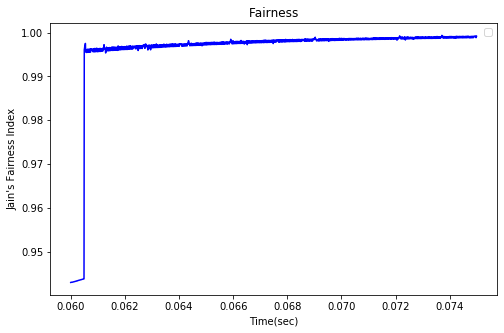

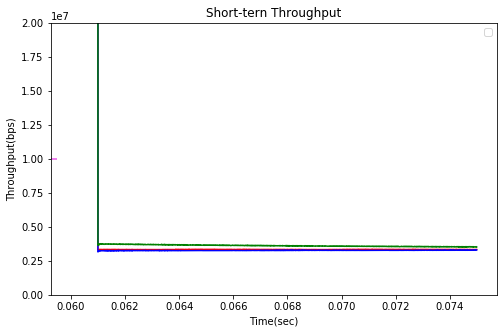

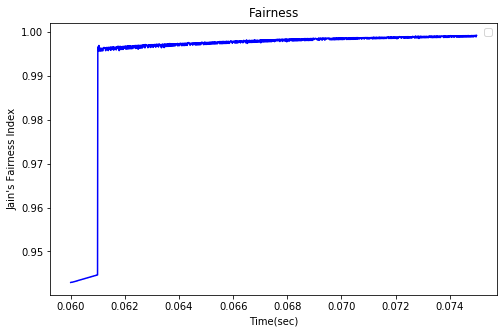

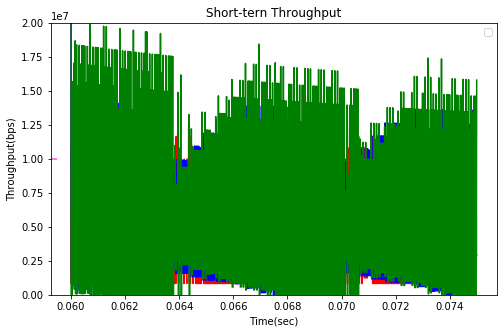

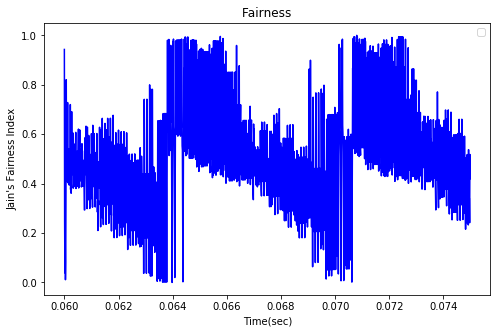

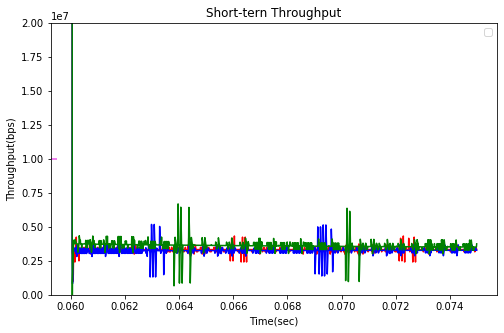

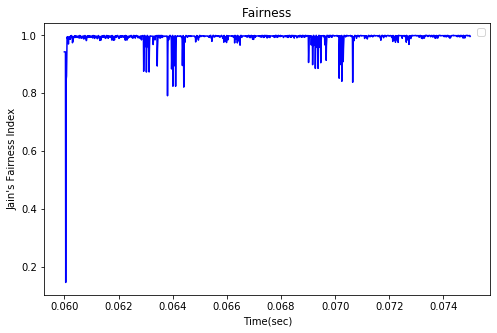

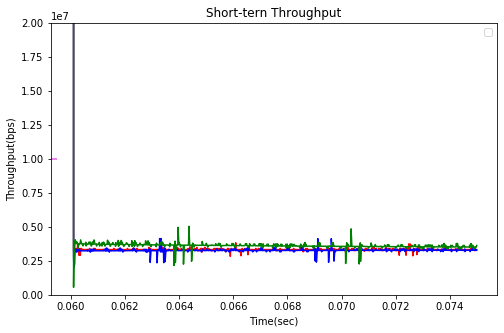

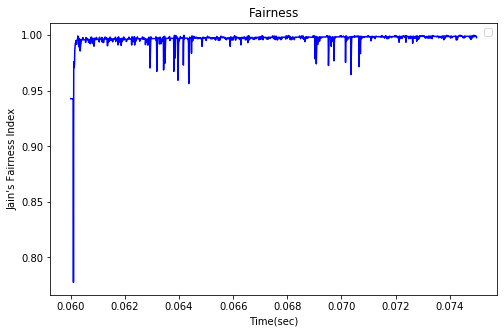

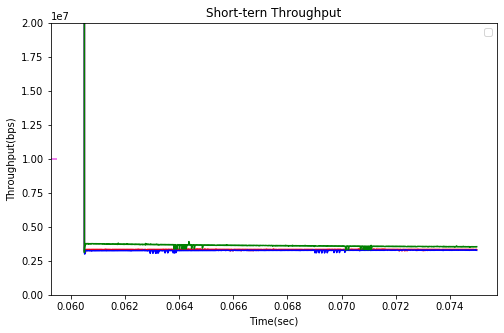

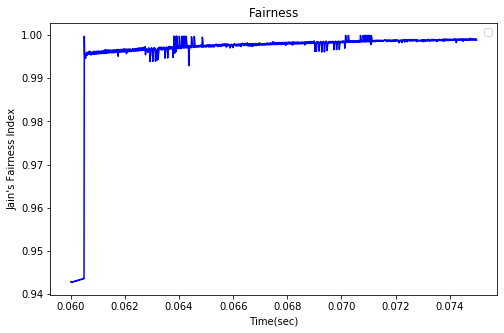

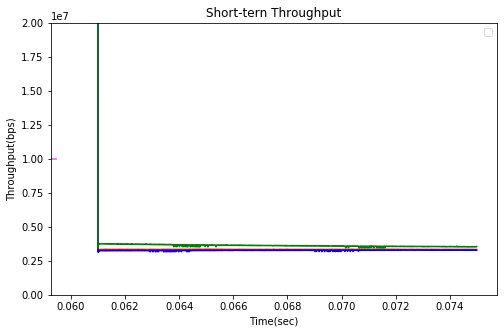

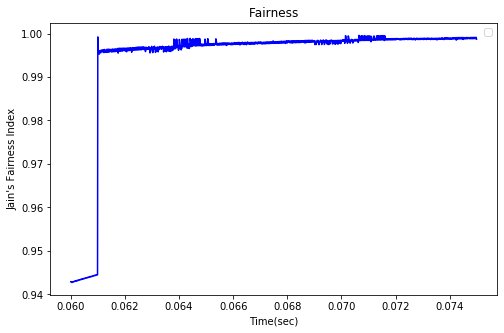

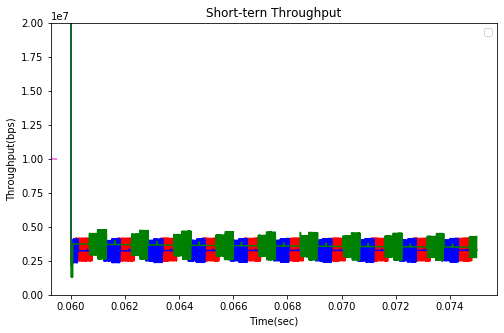

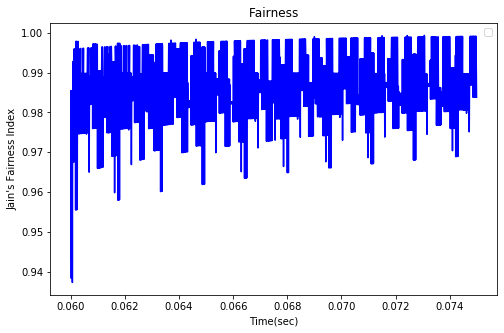

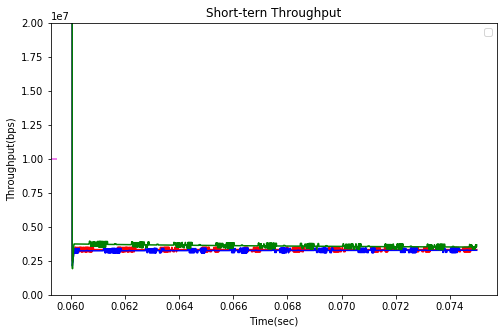

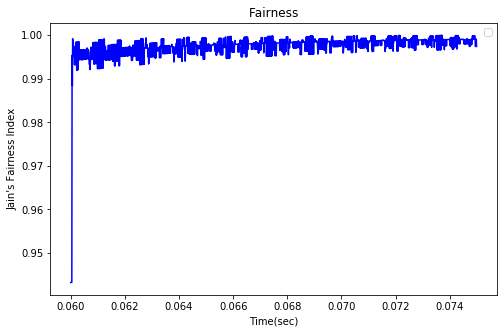

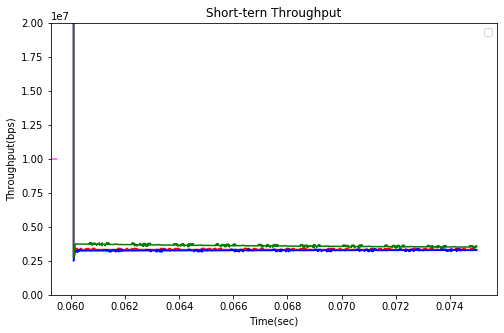

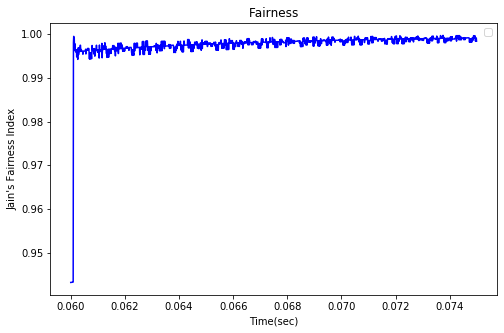

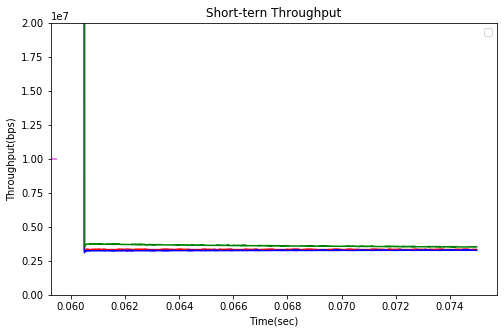

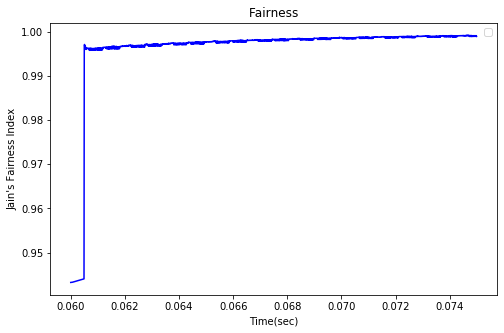

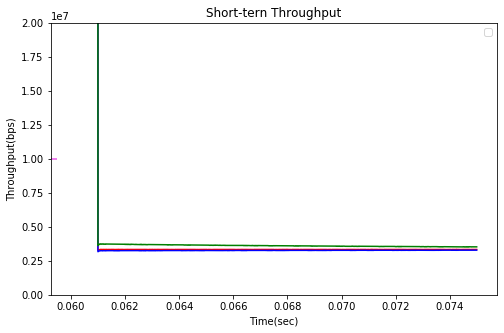

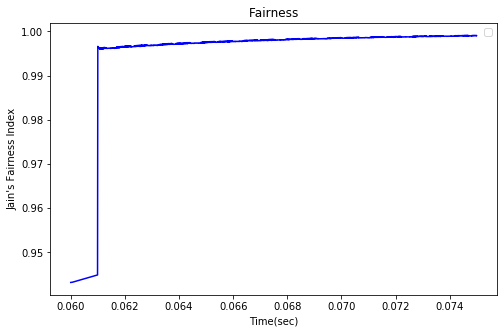

In [47]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.06) & (raw_data_0_HCS['Timestamp'] < 0.075)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.06) & (raw_data_1_HCS['Timestamp'] < 0.075)], raw_data_2_HCS[(raw_data_2_HCS['Timestamp'] >= 0.06) & (raw_data_2_HCS['Timestamp'] < 0.075)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.06) & (raw_data_0_AFQ10['Timestamp'] < 0.075)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.06) & (raw_data_1_AFQ10['Timestamp'] < 0.075)], raw_data_2_AFQ10[(raw_data_2_AFQ10['Timestamp'] >= 0.06) & (raw_data_2_AFQ10['Timestamp'] < 0.075)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.06) & (raw_data_0_AFQ100['Timestamp'] < 0.075)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.06) & (raw_data_1_AFQ100['Timestamp'] < 0.075)], raw_data_2_AFQ100[(raw_data_2_AFQ100['Timestamp'] >= 0.06) & (raw_data_2_AFQ100['Timestamp'] < 0.075)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.06) & (raw_data_0_AFQ1000['Timestamp'] < 0.075)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.06) & (raw_data_1_AFQ1000['Timestamp'] < 0.075)], raw_data_2_AFQ1000[(raw_data_2_AFQ1000['Timestamp'] >= 0.06) & (raw_data_2_AFQ1000['Timestamp'] < 0.075)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_three_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.06) & (raw_data_0_PQ['Timestamp'] < 0.075)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.06) & (raw_data_1_PQ['Timestamp'] < 0.075)], raw_data_2_PQ[(raw_data_2_PQ['Timestamp'] >= 0.06) & (raw_data_2_PQ['Timestamp'] < 0.075)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

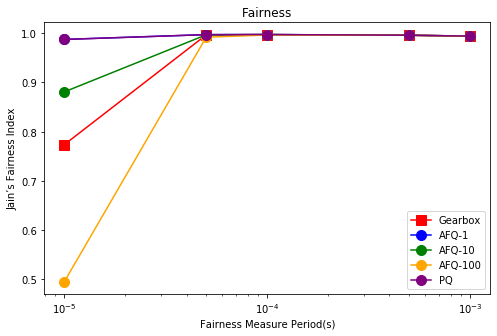

In [48]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 6 - two flow

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in lege

[0.91978132940475821, 0.99882853392166315, 0.99900922183649077, 0.9984408714827866, 0.99771791205643057]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.


[0.9946552495272557, 0.99893329282331311, 0.99901409320750523, 0.99844128076852756, 0.99772026918583678]


/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.92443590417502708, 0.99436115649233581, 0.99900652693960823, 0.9984414722121151, 0.99771606645517108]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.79031873414995579, 0.97918284198871453, 0.99892926190036635, 0.99843825559390564, 0.99771623819087929]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.9946552495272557, 0.99893329282331311, 0.99901409320750523, 0.99844128076852756, 0.99772026918583678]


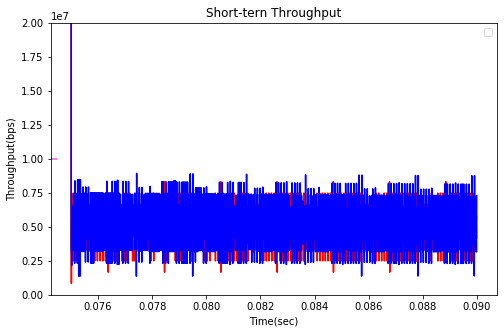

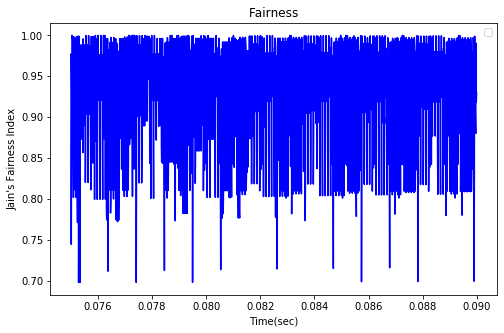

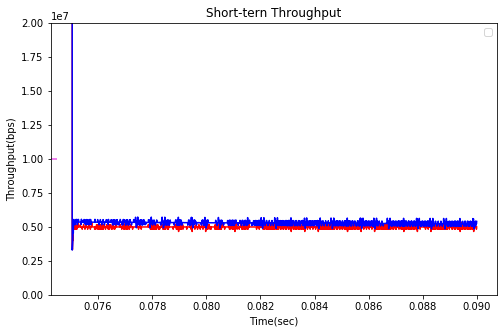

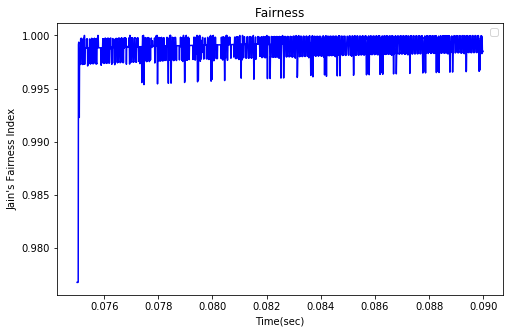

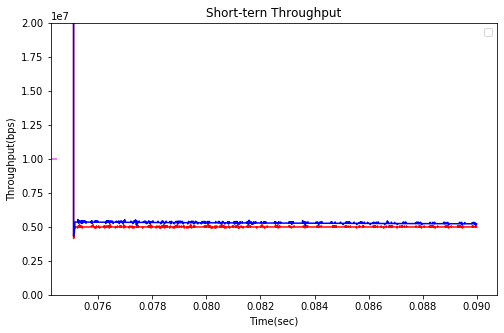

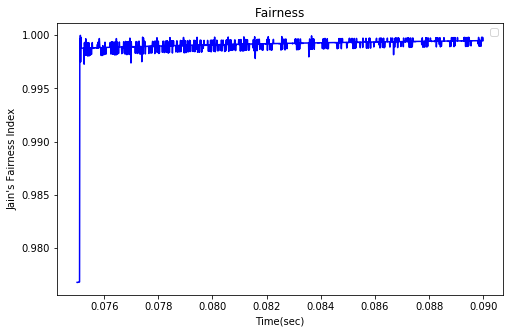

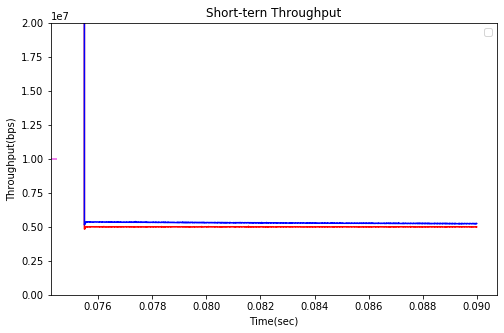

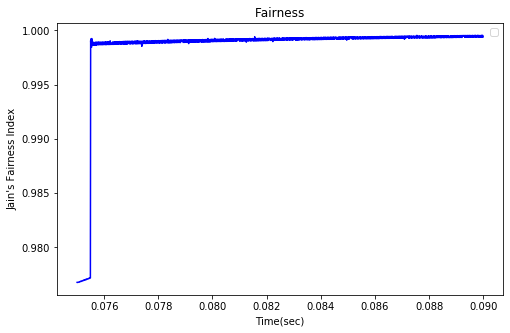

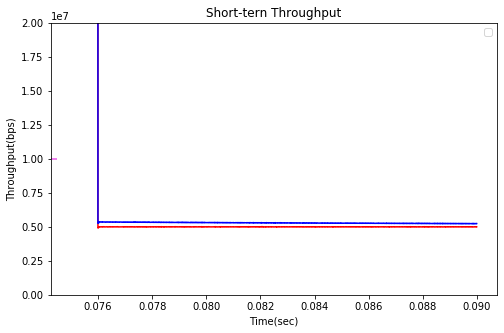

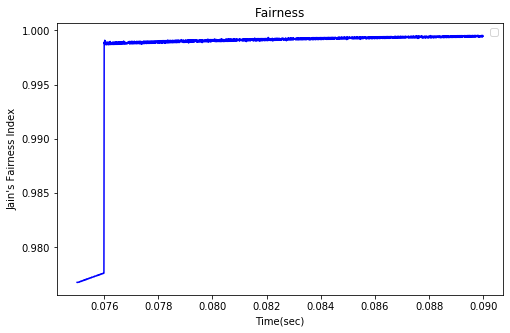

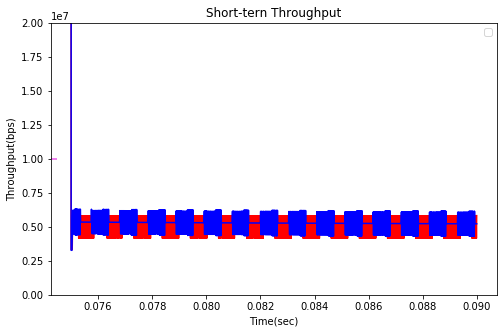

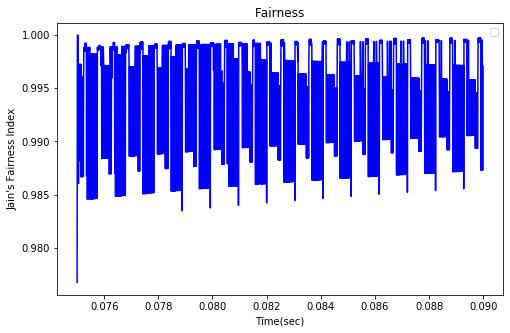

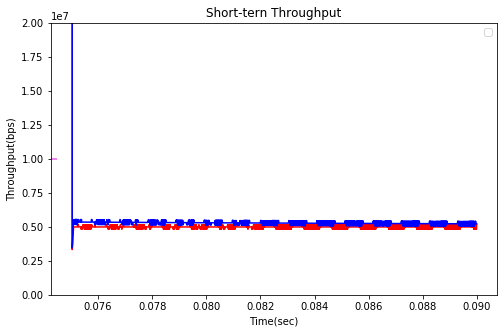

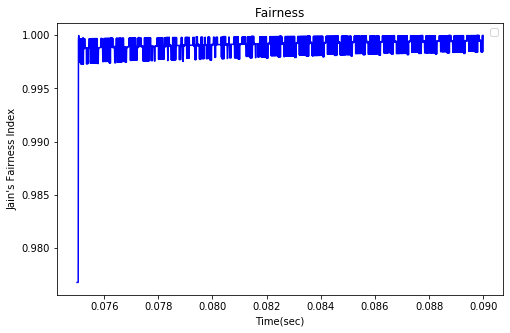

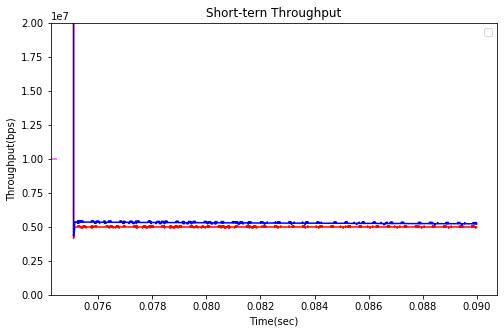

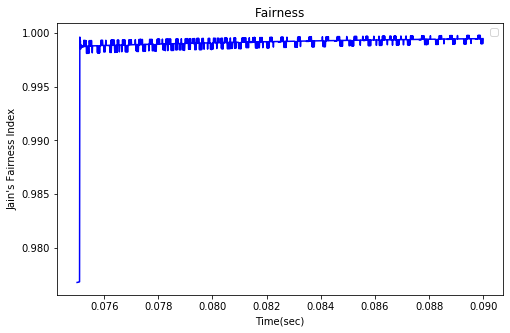

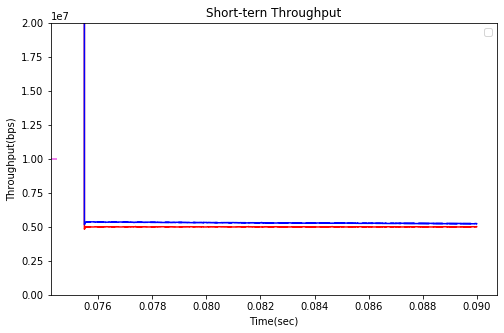

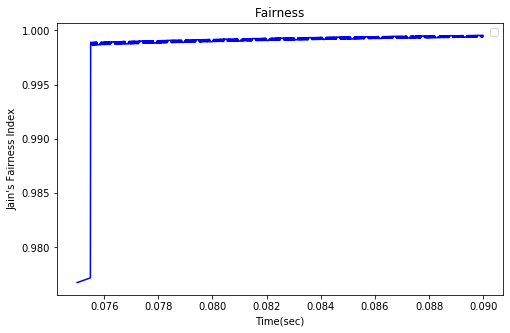

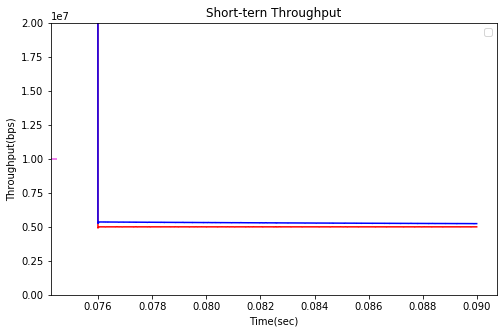

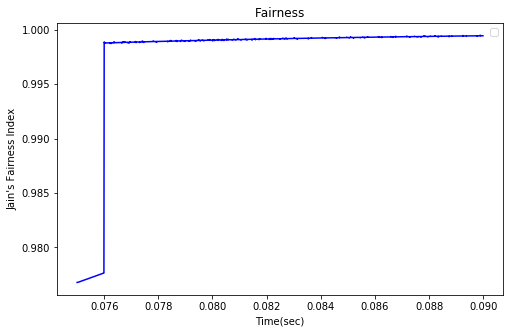

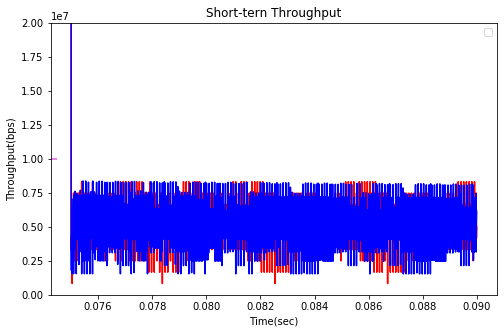

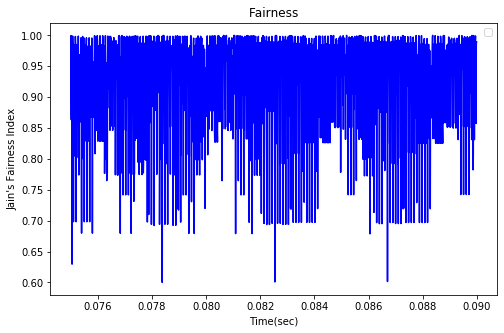

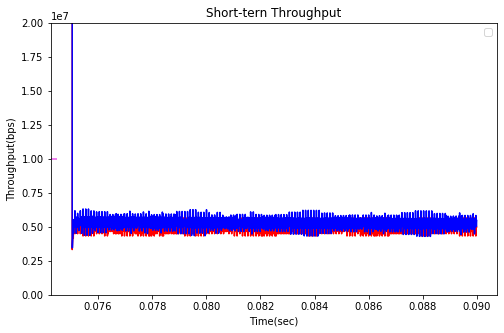

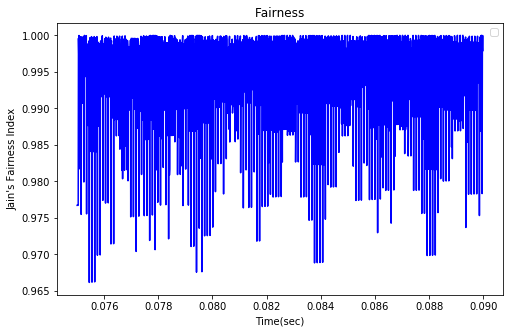

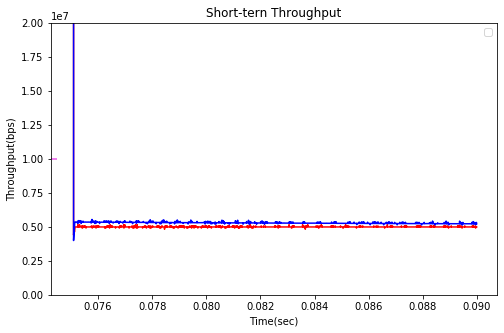

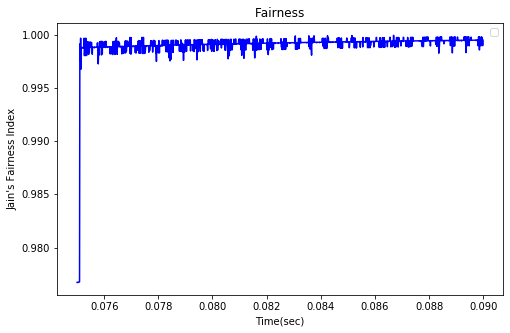

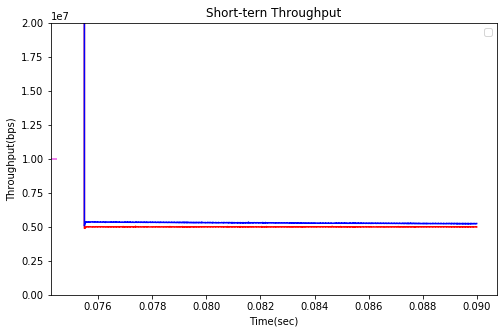

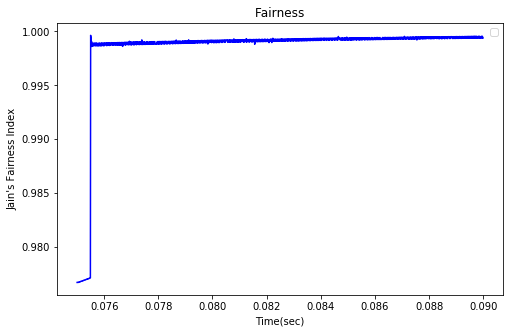

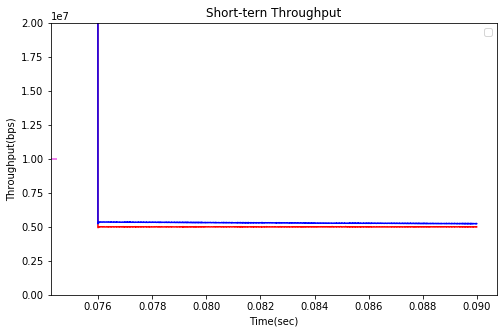

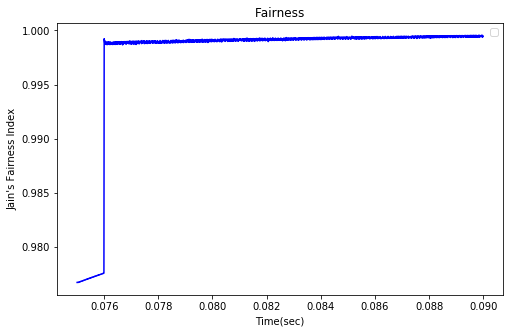

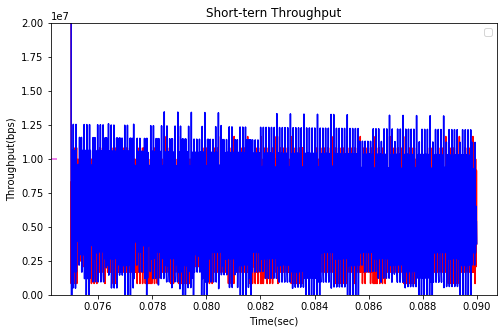

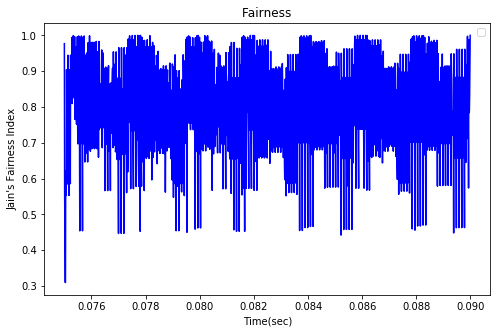

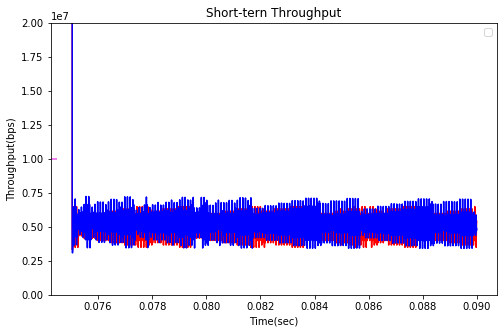

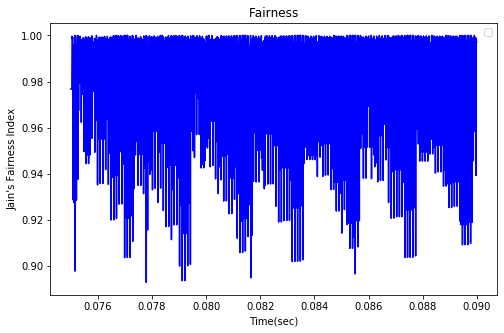

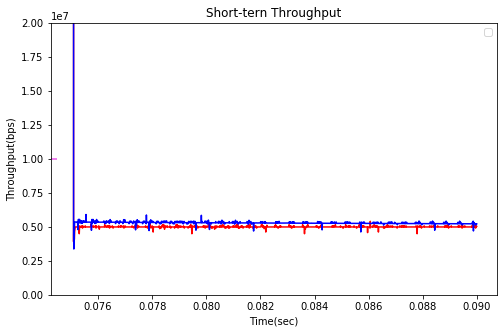

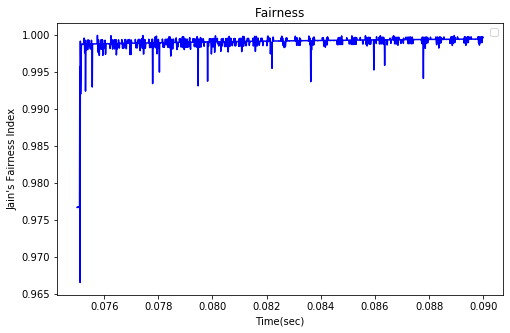

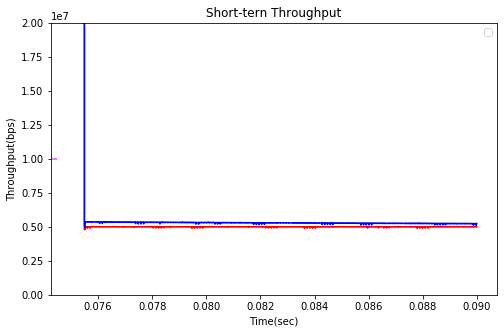

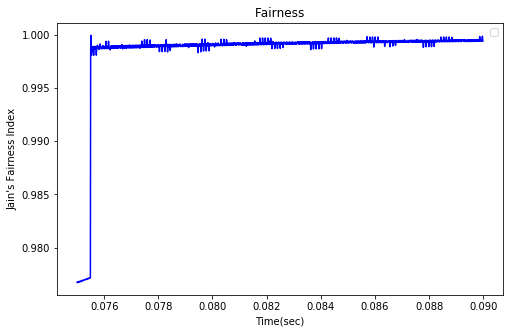

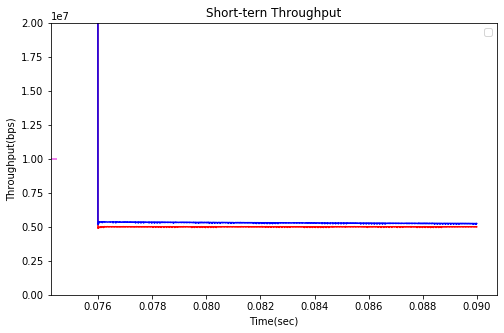

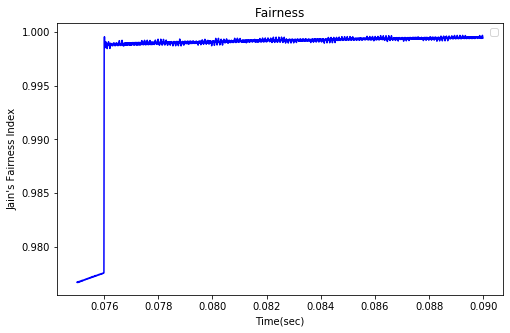

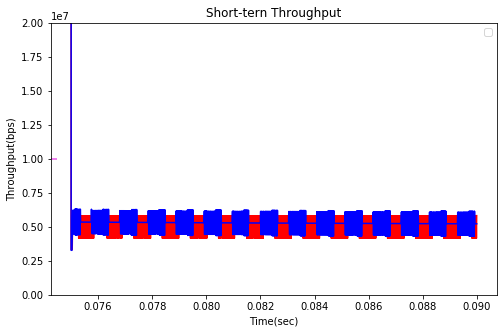

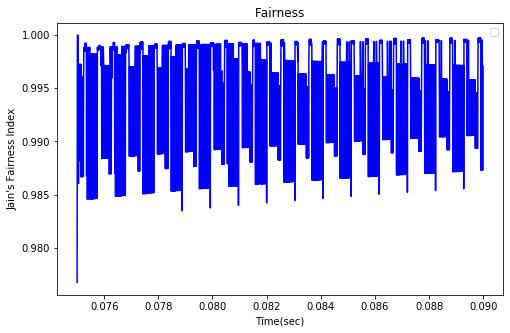

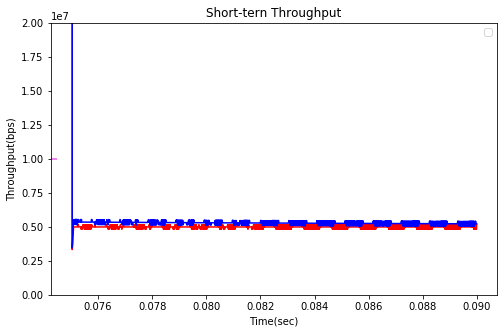

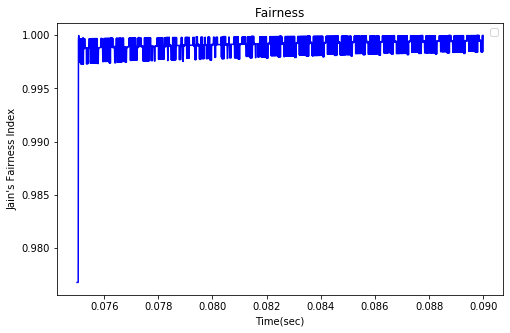

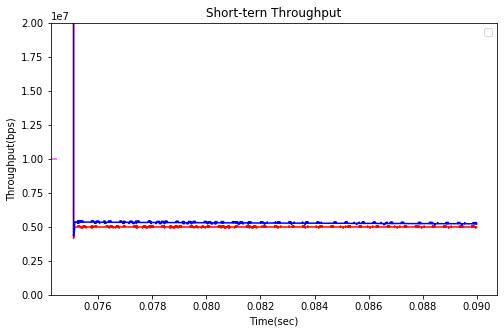

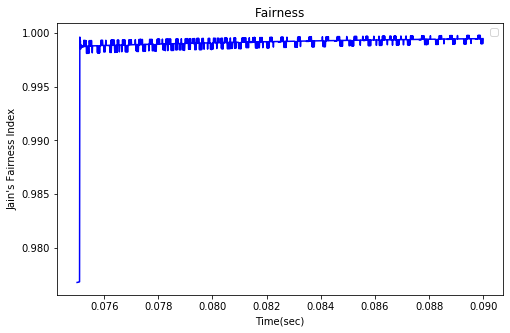

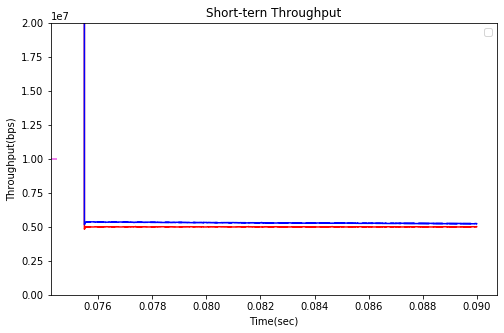

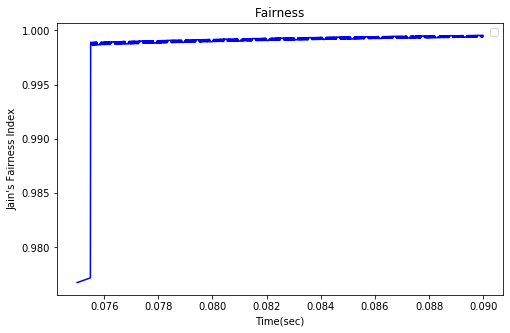

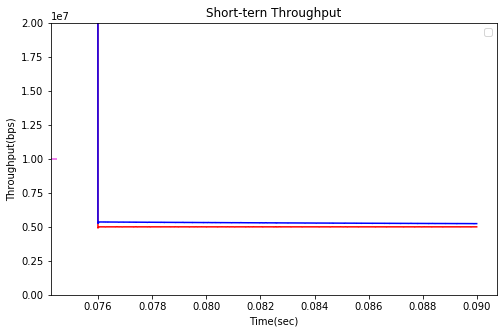

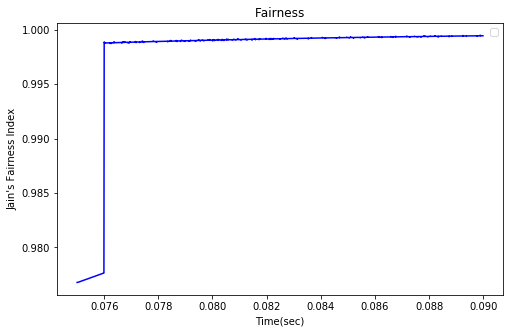

In [49]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] >= 0.075) & (raw_data_0_HCS['Timestamp'] < 0.09)], raw_data_1_HCS[(raw_data_1_HCS['Timestamp'] >= 0.075) & (raw_data_1_HCS['Timestamp'] < 0.09)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] >= 0.075) & (raw_data_0_AFQ10['Timestamp'] < 0.09)], raw_data_1_AFQ10[(raw_data_1_AFQ10['Timestamp'] >= 0.075) & (raw_data_1_AFQ10['Timestamp'] < 0.09)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] >= 0.075) & (raw_data_0_AFQ100['Timestamp'] < 0.09)], raw_data_1_AFQ100[(raw_data_1_AFQ100['Timestamp'] >= 0.075) & (raw_data_1_AFQ100['Timestamp'] < 0.09)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] >= 0.075) & (raw_data_0_AFQ1000['Timestamp'] < 0.09)], raw_data_1_AFQ1000[(raw_data_1_AFQ1000['Timestamp'] >= 0.075) & (raw_data_1_AFQ1000['Timestamp'] < 0.09)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_two_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] >= 0.075) & (raw_data_0_PQ['Timestamp'] < 0.09)], raw_data_1_PQ[(raw_data_1_PQ['Timestamp'] >= 0.075) & (raw_data_1_PQ['Timestamp'] < 0.09)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

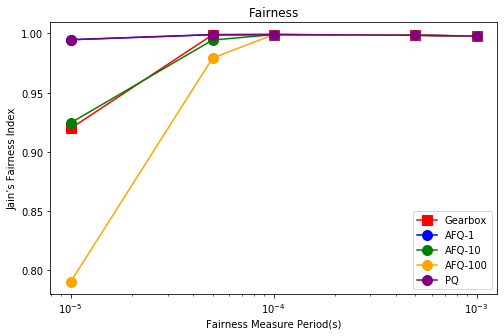

In [50]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()

### interval 7 - one flow  

In [51]:
period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
step_list = [1, 5, 10, 50, 100]
index_list = [0, 1, 2, 3, 4]


average_fairness_HCS = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_HCS[(raw_data_0_HCS['Timestamp'] > 0.09)], period_list[i], step_list[i], average_fairness_HCS)
print(average_fairness_HCS)

average_fairness_AFQ10 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ10[(raw_data_0_AFQ10['Timestamp'] > 0.09)], period_list[i], step_list[i], average_fairness_AFQ10)
print(average_fairness_AFQ10)
    
average_fairness_AFQ100 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ100[(raw_data_0_AFQ100['Timestamp'] > 0.09)], period_list[i], step_list[i], average_fairness_AFQ100)
print(average_fairness_AFQ100)
    
average_fairness_AFQ1000 = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_AFQ1000[(raw_data_0_AFQ1000['Timestamp'] > 0.09)], period_list[i], step_list[i], average_fairness_AFQ1000)
print(average_fairness_AFQ1000)
    
average_fairness_PQ = []
for i in index_list:
    measure_fairness_one_flow(raw_data_0_PQ[(raw_data_0_PQ['Timestamp'] > 0.09)], period_list[i], step_list[i], average_fairness_PQ)
print(average_fairness_PQ)

/Users/kathy/Documents/Anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


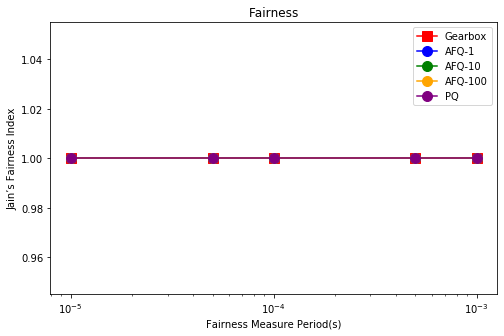

In [52]:
plt.figure(figsize=(8,5))
#plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Fairness Measure Period(s)")
plt.ylabel("Jain’s Fairness Index")
plt.xscale('log')
plt.title("Fairness")

period_list = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
line1 = plt.plot(period_list, average_fairness_HCS, color='red', marker='s', markersize = 10, label='Gearbox')
line2 = plt.plot(period_list, average_fairness_AFQ10, color='blue', marker='o', markersize = 10, label='AFQ-1')
line3 = plt.plot(period_list, average_fairness_AFQ100, color='green', marker='o', markersize = 10, label='AFQ-10')
line4 = plt.plot(period_list, average_fairness_AFQ1000, color='orange', marker='o', markersize = 10, label='AFQ-100')
line5 = plt.plot(period_list, average_fairness_PQ, color='purple', marker='o', markersize = 10, label='PQ')

#plt.legend([line1, line2, line3, line4], loc='best')
plt.legend(loc='best')
plt.show()